# Customer Analysis

Below follows an analysis of customer data.

## Step 1: Import libraries and data
Importing libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from scipy.stats import f_oneway
from scipy.stats import tukey_hsd

from matplotlib.pyplot import figure

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Importing dataset

In [3]:
customer_df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

## Step 2: Data preparation
* Drop irrelevant features
* Change data_types as needed
* Handle duplicates
* Handle null values
* Handle outliers
* Feature encoding
* Reorder columns
* Rename columns
* Feature creation

### Visualize dataset

In [4]:
customer_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

### Get dataset information

**Conclusions on data processing requirements**
* Null values: income
* Feature encoding: education, marital status,
* Data type transforming: Dt_Customer (to_date)
* Unnecessary features: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Z_CostContact, Z_Revenue

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
customer_df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

### Drop irrelevant features

In [7]:
not_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact',
                'Z_Revenue']
customer_df.drop(columns=not_features, inplace=True)

### Change data types

Change dates from object to datetime

In [8]:
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], format='%d-%m-%Y')
customer_df.dtypes


ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Response                        int64
dtype: object

### Get data statistics

Questionable data values and patterns
* Year_Birth = 1893 ?
* Income = 1730.0, 666666.0

In [9]:
customer_df.describe().T

count                           mean  \
ID                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2216.0                   52247.251354   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-10 10:01:42.857142784   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatalogPurchases  2240.0                       2.662054   
NumStorePurchases    2240.0                       5.790179   
NumWebVisitsMonth    2240.0                       5.316518   
Complain             2240.0                       0.009375   
Response             2240.0                       0.149107   

                                     min                  25%  \
ID                                   0.0              2828.25   
Year_Birth                        1893.0               1959.0   
Income                            1730.0              35303.0   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-16 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                23.75   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
Complain                             0.0                  0.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
ID                                5458.5              8427.75   
Year_Birth                        1970.0               1977.0   
Income                           51381.5              68522.0   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-08 12:00:00  2013-12-30 06:00:00   
Recency                             49.0                 74.0   
MntWines                           173.5               504.25   
MntFruits                            8.0                 33.0   
MntMeatProducts                     67.0                232.0   
MntFishProducts                     12.0                 50.0   
MntSweetProducts                     8.0                 33.0   
MntGoldProds                        24.0                 56.0   
NumDealsPurchases                    2.0                  3.0   
NumWebPurchases                      4.0                  6.0   
NumCatalogPurchases                  2.0                  4.0   
NumStorePurchases                    5.0                  8.0   
NumWebVisitsMonth                    6.0                  7.0   
Complain                             0.0                  0.0   
Response                             0.0             

### Handle duplicates

The dataset present no duplicates
* Presence of duplicates is further proven by no duplicated rows with same customer ID

In [10]:
print(customer_df.duplicated().sum())
customer_df.loc[customer_df.duplicated(subset=['ID'])].head()

# Dropping ID column after checking for duplicates
customer_df.drop(columns='ID', inplace=True)

0


### Handle null values

Only income data present null values

Imputing income values:
* Mean value of customer with same Education level

In [11]:
customer_df.isnull().sum().sort_values(ascending=False)
print(f'Number of missing income values: {len(customer_df.loc[customer_df['Income'].isnull()])}')
null_income = customer_df.loc[customer_df['Income'].isnull()]
null_income

Number of missing income values: 24


Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10          1983  Graduation        Married     NaN        1         0   
27          1986  Graduation         Single     NaN        1         0   
43          1959         PhD         Single     NaN        0         0   
48          1951  Graduation         Single     NaN        2         1   
58          1982  Graduation         Single     NaN        1         0   
71          1973    2n Cycle        Married     NaN        1         0   
90          1957         PhD        Married     NaN        2         1   
91          1957  Graduation         Single     NaN        1         1   
92          1973      Master       Together     NaN        0         0   
128         1961         PhD        Married     NaN        0         1   
133         1963  Graduation        Married     NaN        0         1   
312         1989  Graduation        Married     NaN        0         0   
319         1970  Graduation         Single     NaN        1         2   
1379        1970      Master       Together     NaN        0         1   
1382        1958  Graduation       Together     NaN        1         1   
1383        1964    2n Cycle         Single     NaN        1         1   
1386        1972         PhD       Together     NaN        1         0   
2059        1969      Master       Together     NaN        1         1   
2061        1981         PhD         Single     NaN        1         0   
2078        1971  Graduation        Married     NaN        1         1   
2079        1954      Master       Together     NaN        0         1   
2081        1955  Graduation         Single     NaN        0         1   
2084        1943      Master          Widow     NaN        0         0   
2228        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    2013-11-15       11         5          5                6   
27    2013-02-20       19         5          1                3   
43    2013-11-05       80        81         11               50   
48    2014-01-01       96        48          5               48   
58    2013-06-17       57        11          3               22   
71    2012-09-14       25        25          3               43   
90    2012-11-19        4       230         42              192   
91    2014-05-27       45         7          0                8   
92    2013-11-23       87       445         37              359   
128   2013-07-11       23       352          0               27   
133   2013-08-11       96       231         65              196   
312   2013-06-03       69       861        138              461   
319   2013-08-23       67       738         20              172   
1379  2013-04-01       39       187          5               65   
1382  2012-09-03       87        19          4               12   
1383  2014-01-12       49         5          1                9   
1386  2014-03-02       17        25          1               13   
2059  2013-05-18       52       375         42               48   
2061  2013-05-31       82        23          0               15   
2078  2013-03-03       82        71          1               16   
2079  2013-06-23       83       161          0               22   
2081  2013-10-18       95       264          0               21   
2084  2013-10-30       75       532        126              490   
2228  2012-08-12       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48                  6                10             7                  3   
58                  2                 2             6                  2   
71                 17  

In [12]:
# Get average income by education level

ed_level = null_income['Education'].unique().tolist()

income_levels = customer_df.groupby(by='Education')['Income'].mean().apply(lambda x: int(x))
income_levels.to_frame()
income_levels.to_dict()

# Assign average income level to null income values according to education level

for ed, income in income_levels.items():
    mask = customer_df['Income'].isnull() & (customer_df['Education'] == ed)
    customer_df.loc[mask, 'Income'] = income

print(customer_df.isnull().sum())
print('\n')
print(income_levels)


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64


Education
2n Cycle      47633
Basic         20306
Graduation    52720
Master        52917
PhD           56145
Name: Income, dtype: int64


In [13]:
customer_df[customer_df['Education'] == 'PhD'].head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
4         1981       PhD        Married  58293.0        1         0   
7         1985       PhD        Married  33454.0        1         0   
8         1974       PhD       Together  30351.0        1         0   
9         1950       PhD       Together   5648.0        1         1   
15        1946       PhD         Single  82800.0        0         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
4   2014-01-19       94       173         43              118   
7   2013-05-08       32        76         10               56   
8   2013-06-06       19        14          0               24   
9   2014-03-13       68        28          0                6   
15  2012-11-24       23      1006         22              115   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
4                46                27            15                  5   
7                 3                 1            23                  2   
8                 3                 3             2                  1   
9                 1                 1            13                  1   
15               59                68            45                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
4                 5                    3                  6   
7                 4                    0                  4   
8                 3                    0                  2   
9                 1                    0                  0   
15                7                    6                 12   

    NumWebVisitsMonth  Complain  Response  
4                   5         0         0  
7                   8         0         0  
8                   9         0         1  
9                  20         0         0  
15                  3         0         1

### Handle outliers

From df.describe() method apparent outliers include:
* Year_Birth = 1893
* Income = 1730.0, 666666.0

In [14]:
customer_df.describe().T

count                           mean  \
Year_Birth           2240.0                    1968.805804   
Income               2240.0                   52253.588393   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-10 10:01:42.857142784   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatalogPurchases  2240.0                       2.662054   
NumStorePurchases    2240.0                       5.790179   
NumWebVisitsMonth    2240.0                       5.316518   
Complain             2240.0                       0.009375   
Response             2240.0                       0.149107   

                                     min                  25%  \
Year_Birth                        1893.0               1959.0   
Income                            1730.0             35538.75   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-16 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                23.75   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
Complain                             0.0                  0.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
Year_Birth                        1970.0               1977.0   
Income                           51609.5             68289.75   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-08 12:00:00  2013-12-30 06:00:00   
Recency                             49.0                 74.0   
MntWines                           173.5               504.25   
MntFruits                            8.0                 33.0   
MntMeatProducts                     67.0                232.0   
MntFishProducts                     12.0                 50.0   
MntSweetProducts                     8.0                 33.0   
MntGoldProds                        24.0                 56.0   
NumDealsPurchases                    2.0                  3.0   
NumWebPurchases                      4.0                  6.0   
NumCatalogPurchases                  2.0                  4.0   
NumStorePurchases                    5.0                  8.0   
NumWebVisitsMonth                    6.0                  7.0   
Complain                             0.0                  0.0   
Response                             0.0                  0.0   

                                     max           std  
Year_Birth                        1996.0     11.984069  
Income                          666666.0  25039.085473  
Kidhome 

**Boxplot for assumed outliers**

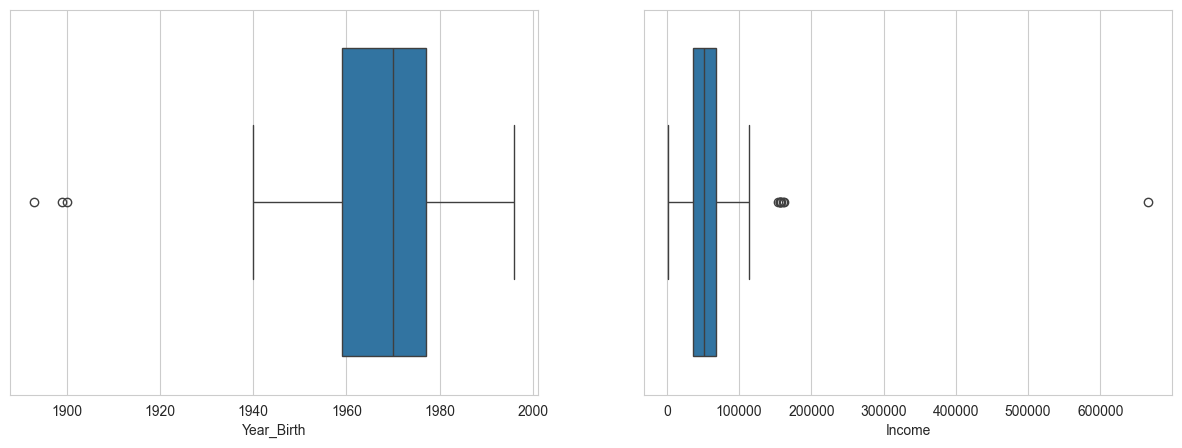

In [15]:
suspected_outliers = ['Year_Birth', 'Income']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(customer_df, x=suspected_outliers[i], ax=axes[i])
plt.show()


**Investigate Year_Birth outliers**

Customers born before 1930 are highly suspicious:
* Kids at home for customer 7829, no kids for 1150, 1 teen for customer 11004
* Web purchases despite age are questionable

The decision is to **eliminate entries** from dataset

In [16]:
older_customers = customer_df.loc[customer_df['Year_Birth'] < 1930]
older_customers

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192        1900  2n Cycle       Divorced  36640.0        1         0   
239        1893  2n Cycle         Single  60182.0        0         1   
339        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  2013-09-26       99        15          6                8   
239  2014-05-17       23         8          0                5   
339  2013-09-26       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  Complain  Response  
192                  5         1         0  
239                  4         0         0  
339                  1         0         0

In [17]:
index_to_drop = customer_df[customer_df['Year_Birth'] < 1930].index
customer_df.drop(index=index_to_drop, inplace=True)

**Investigate Income outliers**

Customers ID 2233 with income of 666666 is suspicious:
* Very low expenditures across all categories
* No response to campaigns given income level

666666 per year would translate to monthly income of 55,555

The average income level for customers with Graduation (equal education level) is 52720 (computed above):
* Assuming a wrongly adding a **6 as unit instead of decimal**, given the context, the decision is to **move a 6 value to decimal position** > 66666.6

In [18]:
high_income = customer_df.loc[customer_df['Income'] >= 666666]
high_income

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233  2013-06-02       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   

      NumWebVisitsMonth  Complain  Response  
2233                  6         0         0

In [19]:
mask = customer_df.loc[customer_df['Income'] >= 666666].index
customer_df.loc[mask, 'Income'] = 66666.6

customer_df['Income'].describe().T

count      2237.000000
mean      51974.825481
std       21410.465328
min        1730.000000
25%       35523.000000
50%       51569.000000
75%       68274.000000
max      162397.000000
Name: Income, dtype: float64

**Visualize again data with boxplots**

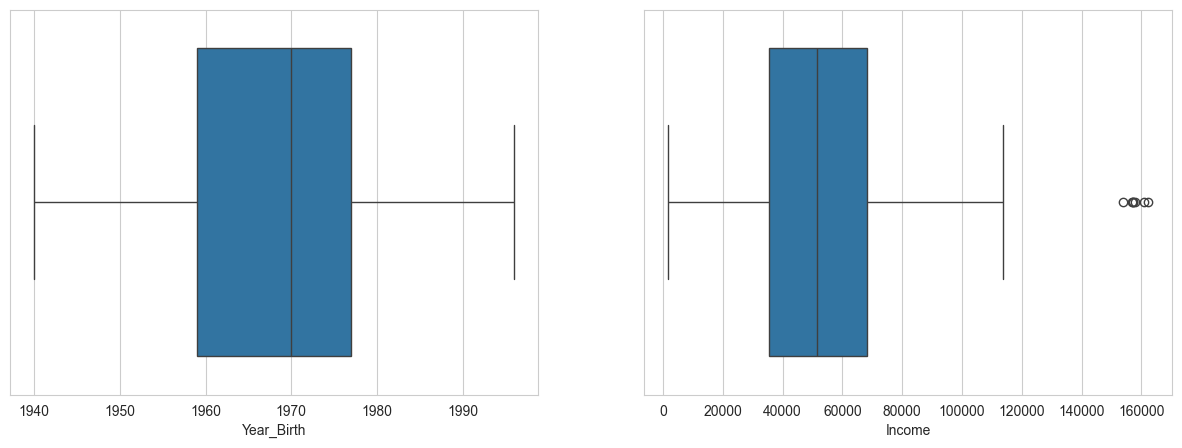

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(customer_df, x=suspected_outliers[i], ax=axes[i])
plt.show()

In [21]:
customer_df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Response  
0         1  
1         0  
2         0  
3         0  
4         0

### Feature encoding
 Features to encode:
 * Education
  * Marital_status

**Encode Education level**

Label encoding names:
* {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}

In [22]:
# Sort by education level
customer_df.sort_values(by='Education', inplace=True)
customer_df.tail()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1226        1955       PhD         Single  61284.0        0         0   
1231        1986       PhD       Together  38197.0        1         0   
1234        1976       PhD       Together  37395.0        1         0   
1188        1962       PhD       Together  31497.0        0         1   
2239        1954       PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1226  2013-10-12       76       618         15              106   
1231  2013-06-29       86        23          0               11   
1234  2014-05-02       47        18          0                9   
1188  2012-12-06       22       108          1               28   
2239  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1226               20                 7            45                  1   
1231                2                 1             3                  1   
1234                0                 1            11                  1   
1188               13                 1             4                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1226               11                    2                  8   
1231                1                    0                  3   
1234                1                    0                  3   
1188                3                    1                  4   
2239                3                    1                  4   

      NumWebVisitsMonth  Complain  Response  
1226                  6         0         0  
1231                  5         0         0  
1234                  6         0         0  
1188                  8         0         0  
2239                  7         0         1

In [23]:
customer_df['Education'].unique()

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [24]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
customer_df['Education'] = le.fit_transform(customer_df['Education'])
labels = le.classes_

education_dic = {}

for i, ed in enumerate(labels):
    education_dic[ed] = i
print(education_dic)


{'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}


**Encoding Marital_Status**

Label encoding names:
* {'Absurd': 0, 'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}

In [25]:
# Sort by marital status
customer_df.sort_values(by='Marital_Status', inplace=True)
customer_df.head()

Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
2093        1993          2         Absurd  79244.0        0         0   
2134        1957          3         Absurd  65487.0        0         0   
153         1988          2          Alone  34176.0        1         0   
131         1958          3          Alone  61331.0        1         1   
138         1973          4          Alone  35860.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2093  2012-12-19       58       471        102              125   
2134  2014-01-10       48       240         67              500   
153   2014-05-12       12         5          7               24   
131   2013-03-10       42       534          5               47   
138   2014-05-19       37        15          0                8   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2093              212                61           245                  1   
2134              199                 0           163                  3   
153                19                14            20                  4   
131                 0                 5            41                  5   
138                 4                 2            20                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2093                4                   10                  7   
2134                3                    5                  6   
153                 3                    0                  4   
131                11                    1                  6   
138                 1                    1                  2   

      NumWebVisitsMonth  Complain  Response  
2093                  1         0         1  
2134                  2         0         0  
153                   6         0         0  
131                   8         0         0  
138                   5         0         1

In [26]:
customer_df['Marital_Status'].unique()

customer_df['Marital_Status'] = le.fit_transform(customer_df['Marital_Status'])
labels = le.classes_

marital_status_dic = {}

for i, stat in enumerate(labels):
    marital_status_dic[stat] = i
print(marital_status_dic)

{'Absurd': 0, 'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}


Reset dataframe oder to show values sorted by index

In [27]:
customer_df.sort_index(inplace=True)
customer_df.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0        1957          2               4  58138.0        0         0   
1        1954          2               4  46344.0        1         1   
2        1965          2               5  71613.0        0         0   
3        1984          2               5  26646.0        1         0   
4        1981          4               3  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Response  
0         1  
1         0  
2         0  
3         0  
4         0

### Feature engineering
* Year_Birth > Age (customer age)
* Dt_Customer > Customer_Tenure (days with company)

In [28]:
customer_df['Customer_Age'] = customer_df['Year_Birth'].apply(lambda x: (datetime.now().year - x))
# Compute tenure in total months
customer_df['Customer_Tenure_Months'] = customer_df['Dt_Customer'].apply(
    lambda x: (datetime.now().year - x.year) * 12 + (datetime.now().month - x.month) - (
        1 if datetime.now().day < x.day else 0)
)
customer_df.sort_values(by='Customer_Tenure_Months').head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
2223        1963          3               3  33562.0        1         2   
1132        1978          2               3  42693.0        1         0   
1798        1964          2               5  63404.0        0         2   
1800        1976          2               5  78416.0        0         1   
964         1980          2               3  50183.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2223  2014-06-25       33        21         12               12   
1132  2014-06-07       29         8          4               20   
1798  2014-06-06       97       734         26               70   
1800  2014-06-27       99       453         38              279   
964   2014-06-25       47        97         12               84   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2223                0                 3             3                  3   
1132                6                 3            16                  1   
1798               11                44            17                  2   
1800              188                38           183                  2   
964                13                10            15                  7   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2223                2                    0                  4   
1132                1                    0                  3   
1798                6                    3                  4   
1800                7                    7                 10   
964                 3                    1                  6   

      NumWebVisitsMonth  Complain  Response  Customer_Age  \
2223                  4         0         0            62   
1132                  5         0         0            47   
1798                  4         0         0            61   
1800                  3         0         0            49   
964                   5         0         0            45   

      Customer_Tenure_Months  
2223                     133  
1132                     133  
1798                     133  
1800                     133  
964                      133

We now drop columns Year_Birth and Dt_Customer

In [29]:
customer_df.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True)

### Reorder columns

In [30]:
customer_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Customer_Age', 'Customer_Tenure_Months'],
      dtype='object')

In [31]:
ordered_columns = [
    # Demographic information
    'Customer_Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Customer_Tenure_Months', 'Recency',
    # Spending information
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    # Purchase behavior
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    # Feedback and response
    'Complain', 'Response']

customer_df = customer_df[ordered_columns]

### Rename columns

In [32]:
column_rename_map = {
    'Education': 'Education_Level',
    'Marital_Status': 'Marital_Status',
    'Income': 'Household_Income',
    'Kidhome': 'Num_Children',
    'Teenhome': 'Num_Teenagers',
    'Recency': 'Days_Since_Last_Purchase',

    'MntWines': 'Spent_Wine',
    'MntFruits': 'Spent_Fruits',
    'MntMeatProducts': 'Spent_Meat',
    'MntFishProducts': 'Spent_Fish',
    'MntSweetProducts': 'Spent_Sweets',
    'MntGoldProds': 'Spent_Gold',

    'NumDealsPurchases': 'Purchases_With_Discount',
    'NumWebPurchases': 'Web_Purchases',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitsMonth': 'Web_Visits_Last_Month',

    'Complain': 'Made_Complaint',
    'Response': 'Accepted_Last_Campaign'
}

In [33]:
customer_df.rename(columns=column_rename_map, inplace=True)
customer_df.head()

Customer_Age  Education_Level  Marital_Status  Household_Income  \
0            68                2               4           58138.0   
1            71                2               4           46344.0   
2            60                2               5           71613.0   
3            41                2               5           26646.0   
4            44                4               3           58293.0   

   Num_Children  Num_Teenagers  Customer_Tenure_Months  \
0             0              0                     155   
1             1              1                     136   
2             0              0                     143   
3             1              0                     137   
4             1              0                     138   

   Days_Since_Last_Purchase  Spent_Wine  Spent_Fruits  Spent_Meat  Spent_Fish  \
0                        58         635            88         546         172   
1                        38          11             1           6           2   
2                        26         426            49         127         111   
3                        26          11             4          20          10   
4                        94         173            43         118          46   

   Spent_Sweets  Spent_Gold  Purchases_With_Discount  Web_Purchases  \
0            88          88                        3              8   
1             1           6                        2              1   
2            21          42                        1              8   
3             3           5                        2              2   
4            27          15                        5              5   

   Catalog_Purchases  Store_Purchases  Web_Visits_Last_Month  Made_Complaint  \
0                 10                4                      7               0   
1                  1                2                      5               0   
2                  2               10                      4               0   
3                  0                4                      6               0   
4                  3                6                      5               0   

   Accepted_Last_Campaign  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0

## Step 3: Univariate data analysis

In [34]:
cat_features = ['Education_Level', 'Marital_Status']
binary_features = ['Made_Complaint', 'Accepted_Last_Campaign']
continuous_features = ['Household_Income', 'Num_Children', 'Num_Teenagers', 'Days_Since_Last_Purchase', 'Spent_Wine',
                       'Spent_Fruits', 'Spent_Meat', 'Spent_Fish', 'Spent_Sweets', 'Spent_Gold', 'Catalog_Purchases',
                       'Store_Purchases', 'Purchases_With_Discount', 'Web_Purchases', 'Web_Visits_Last_Month']

### Customer Age

**Key Insights:**

Predominantly adult customer base.
* Majority of customers between 45 and 55 yaears

**Questions raised for further analysis:**
* Impact of age difference in customer spending patterns and buying behavior

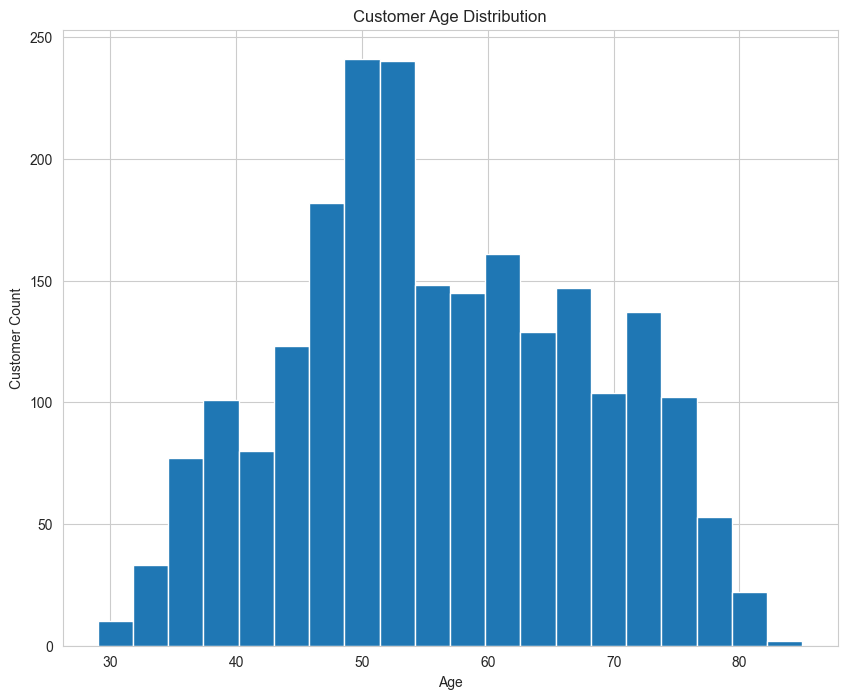

In [35]:
ax = customer_df['Customer_Age'].plot.hist(
    bins=20,
    figsize=(10, 8),
    title='Customer Age Distribution'
)
ax.set_xlabel('Age')
ax.set_ylabel('Customer Count')
plt.show()

### Education level

**Key Insights:**

Based on results, the customer base is mainly with good education.
* Majority with graduation degree
* Second most frequent education level is PhD
* Only a few have just basic or 2nd cycle of education completed

**Questions raised for further analysis:**
* Higher education level leading to higher spending in specif areas (such as wine or gold)
* Education level may influence the purchase behavior (such as more web or catalog purchases)

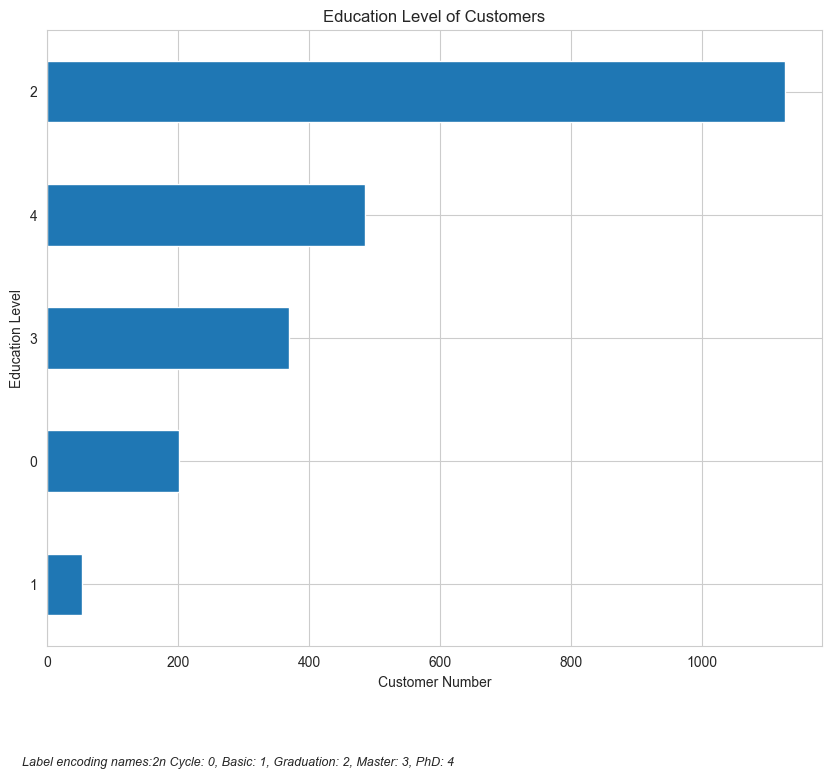

In [36]:
ax = customer_df.groupby(by='Education_Level')['Education_Level'].count().sort_values().plot(kind='barh',
                                                                                             figsize=(10, 8),
                                                                                             title='Education Level of Customers')
ax.set_ylabel('Education Level')
ax.set_xlabel('Customer Number')
plt.figtext(0.1, -0.04, 'Label encoding names:2n Cycle: 0, Basic: 1, Graduation: 2, Master: 3, PhD: 4', wrap=True,
            fontsize=9, fontstyle='italic')
plt.show()

### Marital status

**Key Insights:**
Customer based mainly composed by people living together and single
* Mostly married or together, therefore living as couple
* Many single customers

**Questions raised for further analysis:**
* Spending for couples may be higher
* Spending for singles may be lower
* The difference couple vs. single may be reflected on type of purchases

**Dataset modifications**
* Alone > unified with singles
* YOLO and Absurd > merged into "Others" category


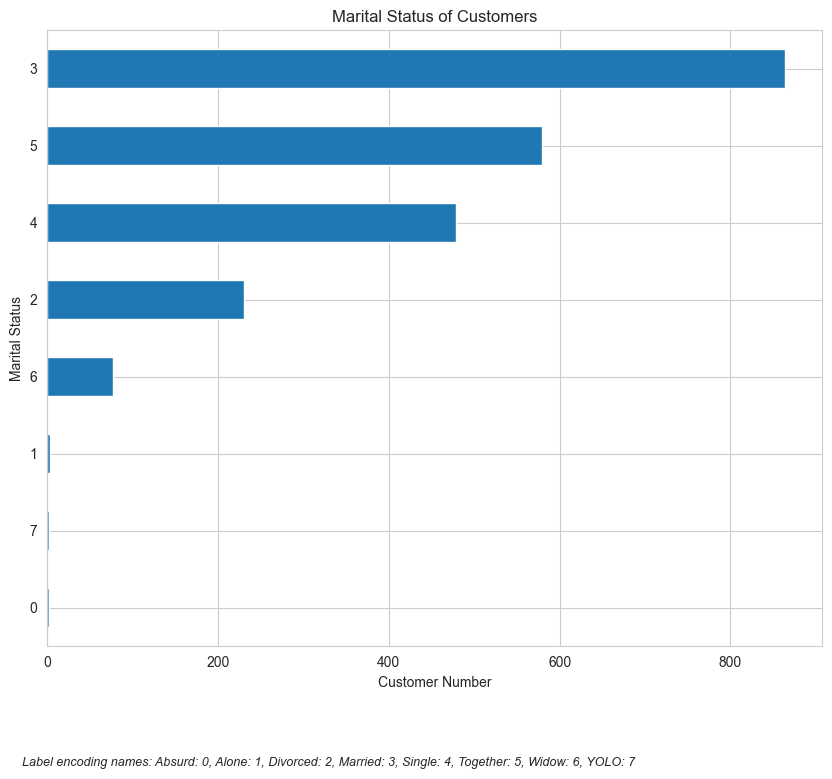

In [37]:
ax = customer_df.groupby(by='Marital_Status')['Marital_Status'].count().sort_values().plot(kind='barh', figsize=(10, 8),
                                                                                           title='Marital Status of Customers')
ax.set_ylabel('Marital Status')
ax.set_xlabel('Customer Number')
plt.figtext(0.1, -0.04,
            'Label encoding names: Absurd: 0, Alone: 1, Divorced: 2, Married: 3, Single: 4, Together: 5, Widow: 6, YOLO: 7',
            wrap=True, fontsize=9, fontstyle='italic')
plt.show()

**Applying dataset changes**
* Alone > Single
* YOLO & Absurd > Others

**Data imputation**
* Since customers wth marital status of "Others" are supposedly neither married or together, we can categorize those as "Single"

In [38]:
customer_df.loc[customer_df['Marital_Status'] == 1, 'Marital_Status'] = 4
customer_df.loc[customer_df['Marital_Status'].isin([0, 7]), 'Marital_Status'] = 8
customer_df['Marital_Status'].unique()

# Analyze whether these customers are relevant to analysis or whether they can be dropped to further simplify dataset
print(
    f"Number of customers with education level equal to \"Others\": {len(customer_df.loc[customer_df['Marital_Status'] == 8])}")

# Assign YOLO and Absurd ("Others") to Single
customer_df.loc[customer_df['Marital_Status'] == 8, 'Marital_Status'] = 4


Number of customers with education level equal to "Others": 4


ax = customer_df.groupby(by='Marital_Status')['Marital_Status'].count().sort_values().plot(kind='barh', figsize=(10, 8),
                                                                                           title='Marital Status of Customers')
ax.set_ylabel('Marital Status')
ax.set_xlabel('Customer Number')
plt.figtext(0.1, -0.04,
            'Label encoding names: Absurd: 0, Alone: 1, Divorced: 2, Married: 3, Single: 4, Together: 5, Widow: 6, YOLO: 7',
            wrap=True, fontsize=9, fontstyle='italic')
plt.show()**Visualize data after modification**

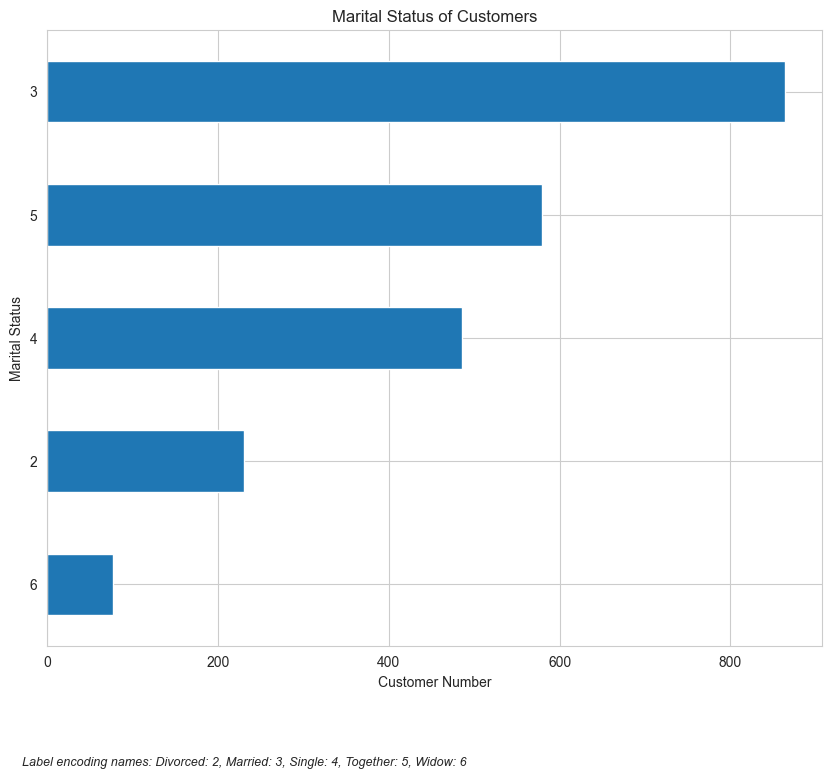

In [39]:
ax = customer_df.groupby(by='Marital_Status')['Marital_Status'].count().sort_values().plot(kind='barh', figsize=(10, 8),
                                                                                           title='Marital Status of Customers')
ax.set_ylabel('Marital Status')
ax.set_xlabel('Customer Number')
plt.figtext(0.1, -0.04,
            'Label encoding names: Divorced: 2, Married: 3, Single: 4, Together: 5, Widow: 6',
            wrap=True, fontsize=9, fontstyle='italic')
plt.show()

## Feedback Analysis

**Key Insights:**
* Almost all customers did not complain
* Few customers accepted last campaign

**Decisions based on observed data:**
* Drop the "Made_Complaint" feature
* Drop "Accepted_Last_Campaign" feature > Although relevant, in the context of this study the feature does not significantly matter > Classifying customers into segments

The researcher decided to be highly specific for the problem on hand, therefore dropping features which are not strictly influential (using domain knowledge)

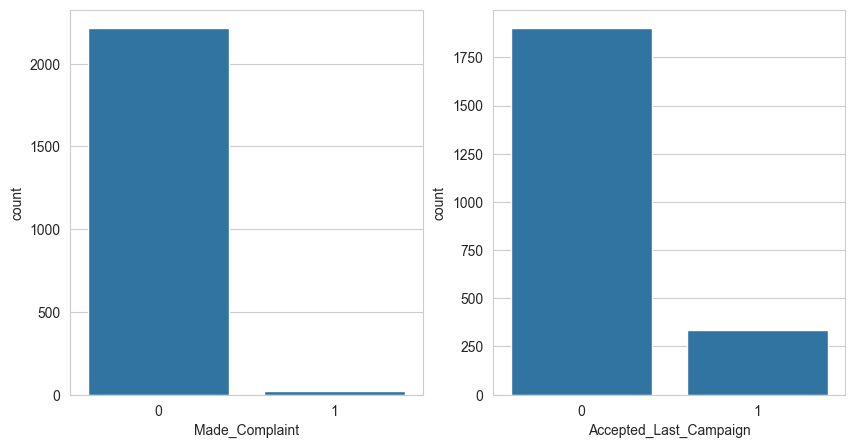

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, ax in enumerate(axes):
    sns.countplot(ax=axes[i], data=customer_df, x=customer_df[binary_features[i]])
plt.show()

**Dropping features**

In [41]:
customer_df.drop(columns=['Made_Complaint', 'Accepted_Last_Campaign'], inplace=True)

### Demographic analysis
**Key Insights:**
* Income is right skewed
* Customers with mostly no kids and teenagers or only 1

**Questions for further research**
* Income level may influence the purchase behavior across categories and buying channel
* Number of kids or teens may influence the purchase behavior across categories and buying channel

**Notes**
* Although possible to merge Number of Kids with Number of Teenagers into a single feature, the researcher decides to maintain the data separate
    * Presence of kids and/or teenagers may influence shopping behavior

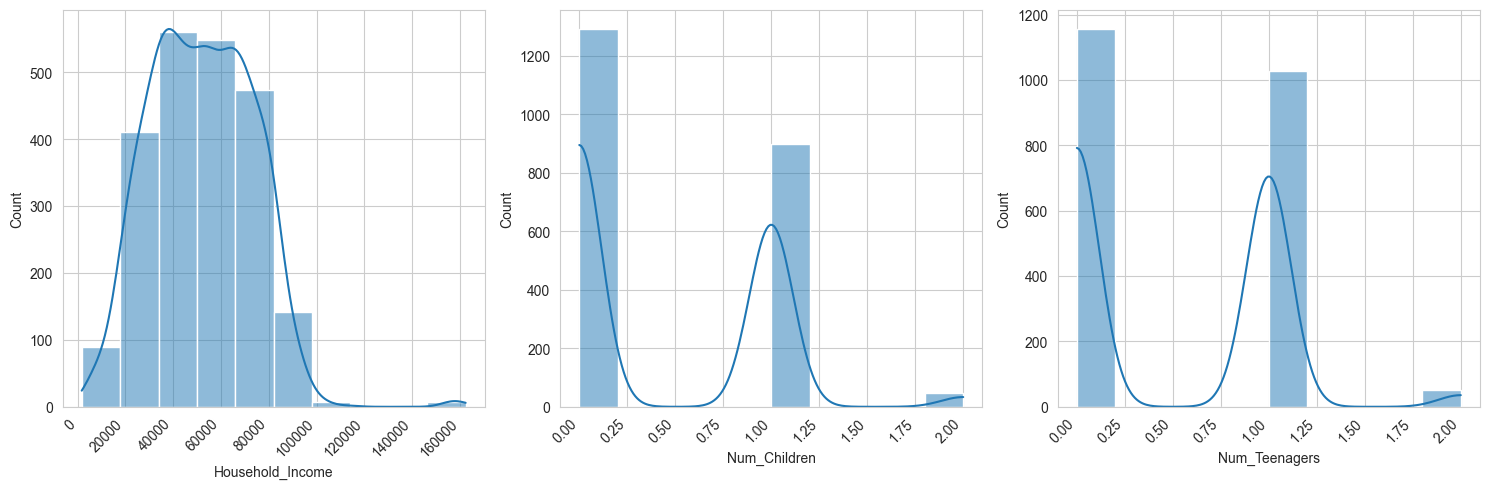

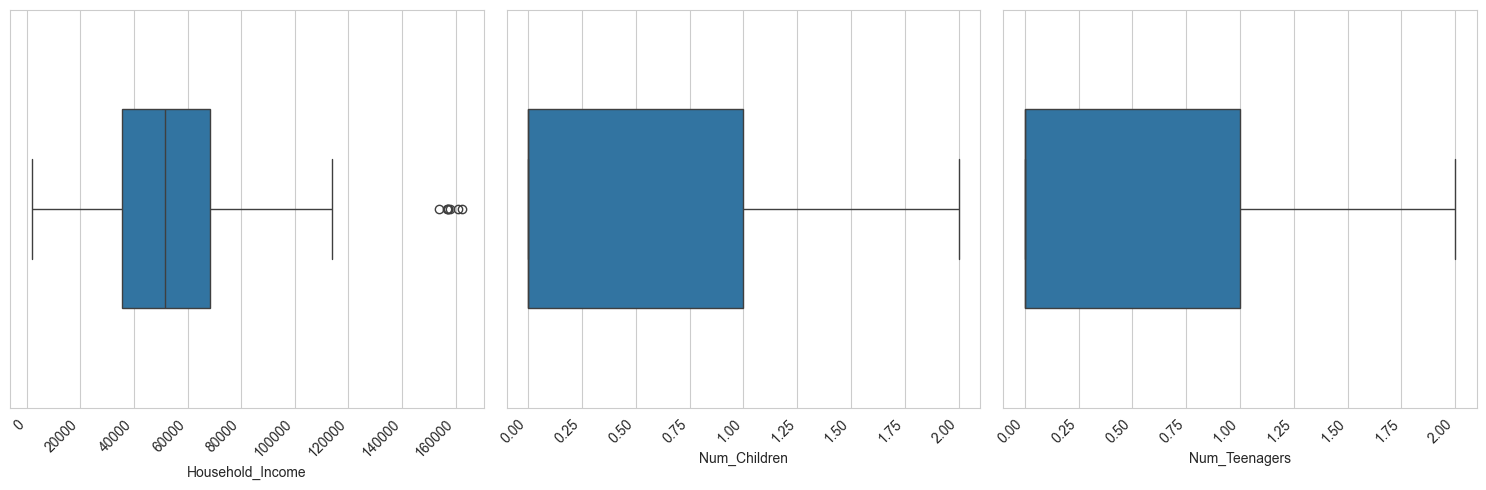

In [42]:
demographic_features = ['Household_Income', 'Num_Children', 'Num_Teenagers']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    sns.histplot(customer_df[demographic_features[i]], ax=axes[i], kde=True, bins=10)

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    sns.boxplot(customer_df[demographic_features[i]], ax=axes[i], orient='h', width=0.5)

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.show()

### Purchase behavior analysis
**Key Insights:**

Shopping categories
* All shopping categories are caractherized by mainly very low to low value purchases, with few customers spending more
* Wine is the category with most purchases, based on data observed

Buying channels
* Customers purchase mainly from store
* After store, web and catalog purchases follow, although not in remarkable amounts

Buying behavior
* Virtually all customers visit website page maximum 10 times per month, with the majority visiting it around 7-8 times
* Limited purchases with discounts
* Customers purchase from the company for 140-150 months ≈ (11.7 to 12.5 years) signifying high levels of loyalty (to further prove loyalty such as CLT value and actual purchases within tenure)

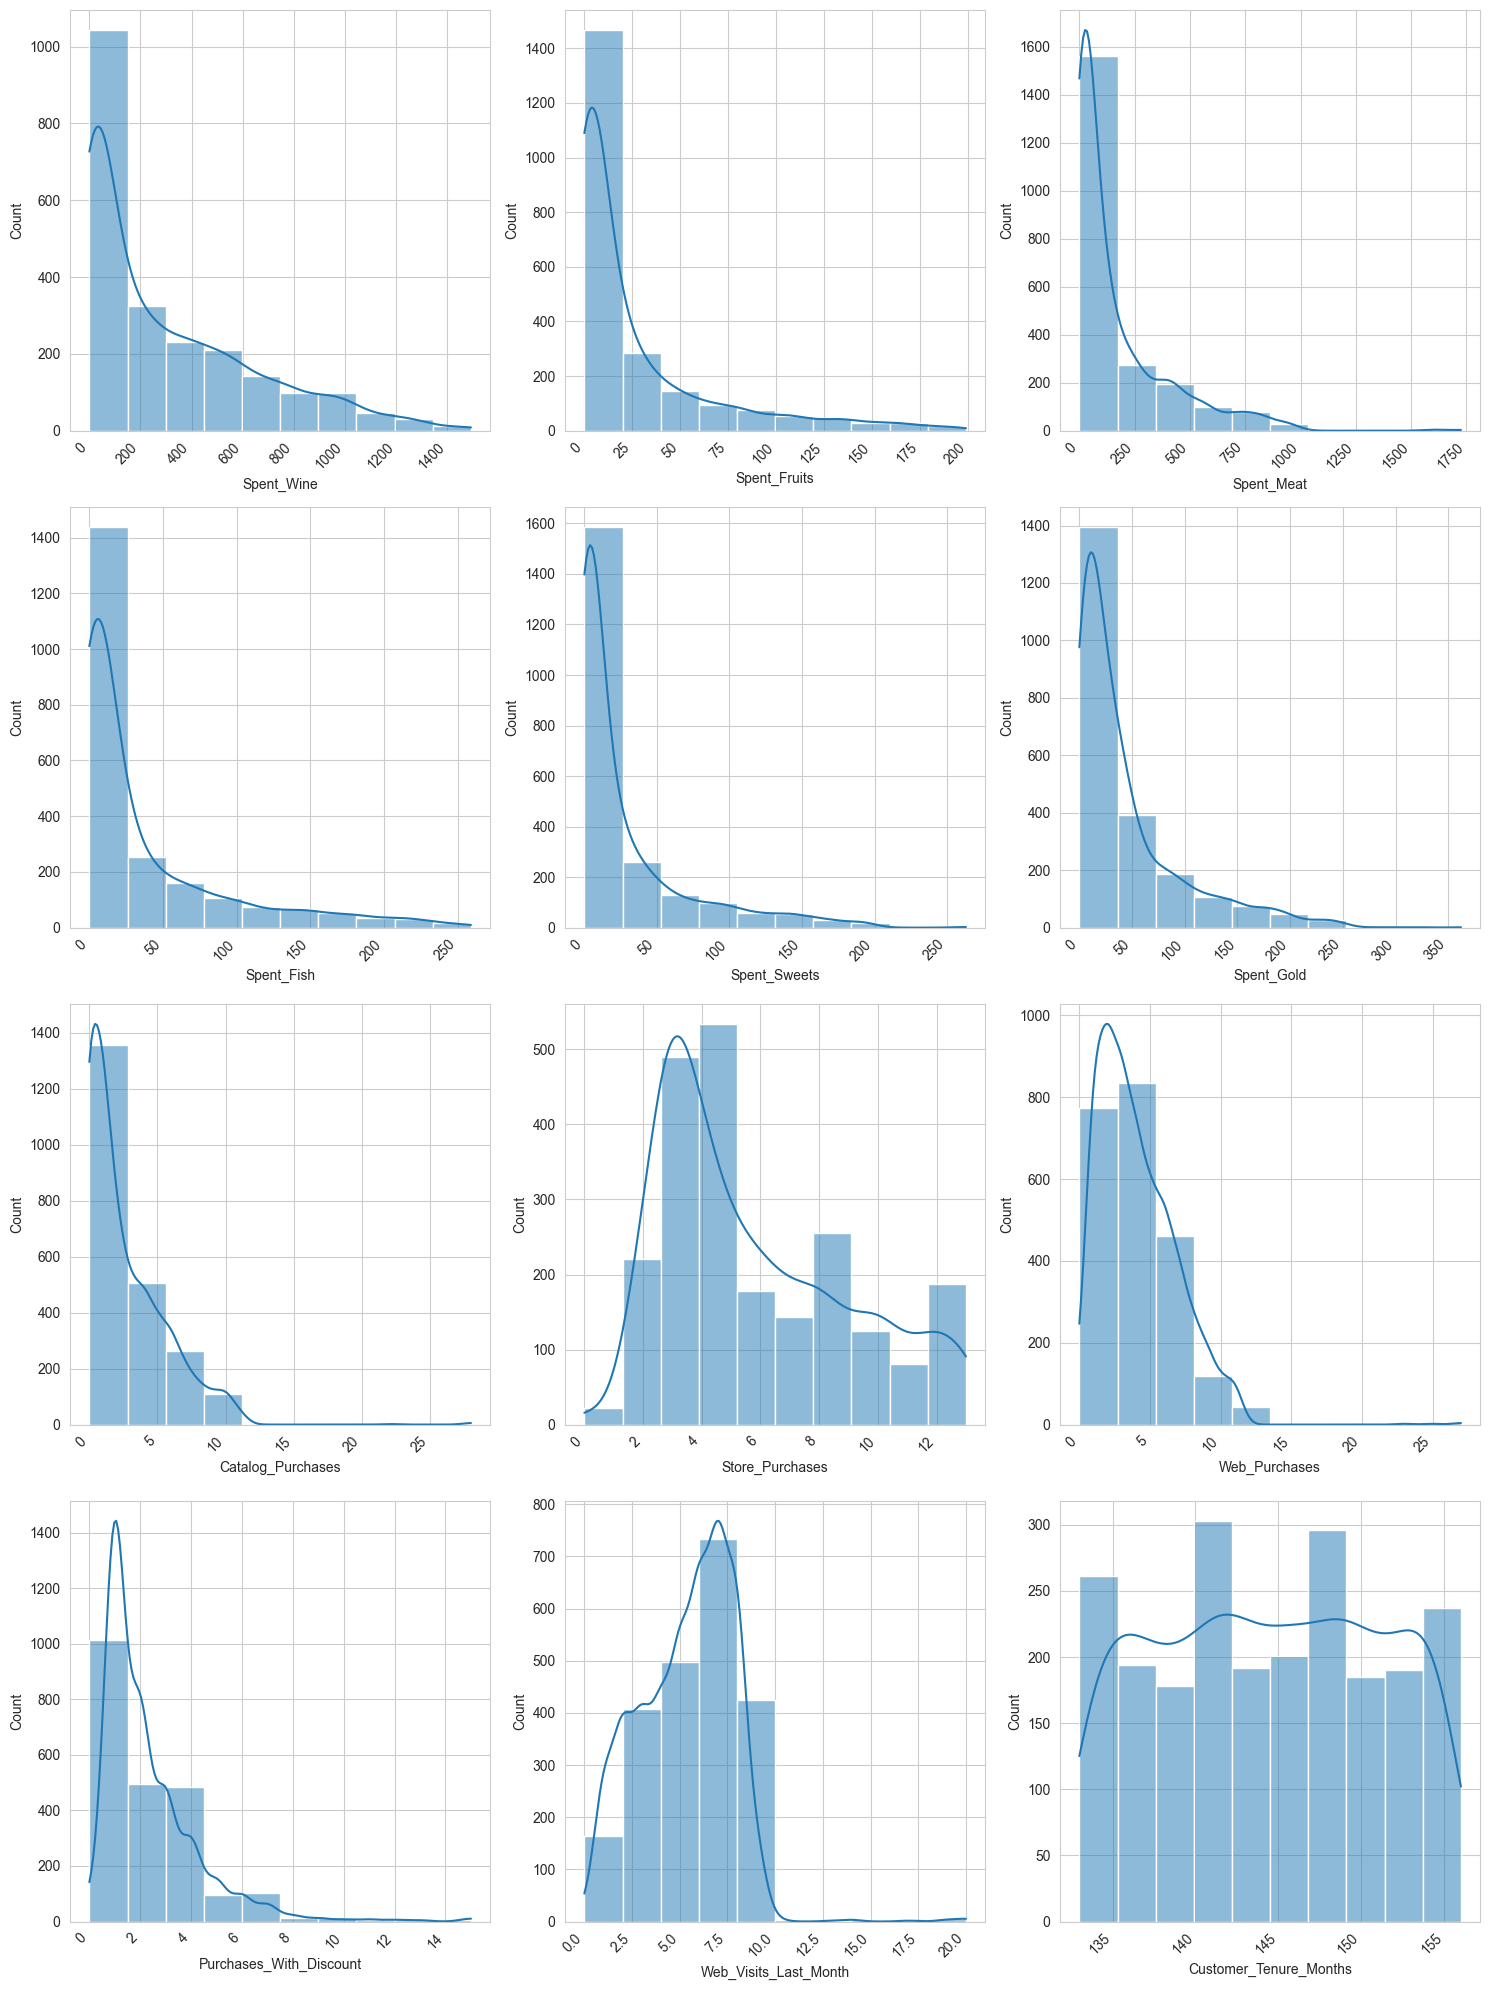

In [43]:
purchase_behavior = ['Spent_Wine', 'Spent_Fruits', 'Spent_Meat', 'Spent_Fish', 'Spent_Sweets', 'Spent_Gold',
                     'Catalog_Purchases', 'Store_Purchases', 'Web_Purchases', 'Purchases_With_Discount',
                     'Web_Visits_Last_Month', 'Customer_Tenure_Months']

fig, axes = plt.subplots(4, 3, figsize=(15, 20))

for i, ax in enumerate(axes.flatten()):
    if i < len(purchase_behavior):
        sns.histplot(customer_df[purchase_behavior[i]], ax=ax, kde=True, bins=10)

        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
    else:
        ax.axis('off')  # Hide unused subplot

plt.tight_layout()
plt.show()

## Step 4: Multivariate data analysis

In [44]:
customer_df.columns

Index(['Customer_Age', 'Education_Level', 'Marital_Status', 'Household_Income',
       'Num_Children', 'Num_Teenagers', 'Customer_Tenure_Months',
       'Days_Since_Last_Purchase', 'Spent_Wine', 'Spent_Fruits', 'Spent_Meat',
       'Spent_Fish', 'Spent_Sweets', 'Spent_Gold', 'Purchases_With_Discount',
       'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases',
       'Web_Visits_Last_Month'],
      dtype='object')

### Compute correlation between numeric features

In [45]:
corr = customer_df.select_dtypes(include='number').corr()
corr

Customer_Age  Education_Level  Marital_Status  \
Customer_Age                  1.000000         0.184055        0.061167   
Education_Level               0.184055         1.000000        0.003880   
Marital_Status                0.061167         0.003880        1.000000   
Household_Income              0.198825         0.145076        0.011132   
Num_Children                 -0.234133        -0.044977       -0.018396   
Num_Teenagers                 0.363350         0.119420       -0.008247   
Customer_Tenure_Months       -0.017437        -0.053706        0.007949   
Days_Since_Last_Purchase      0.019670        -0.010695        0.018005   
Spent_Wine                    0.163035         0.195699        0.006126   
Spent_Fruits                  0.013751        -0.083797        0.003018   
Spent_Meat                    0.030927         0.031264        0.030930   
Spent_Fish                    0.042519        -0.114398        0.045209   
Spent_Sweets                  0.019571        -0.107245        0.016747   
Spent_Gold                    0.057599        -0.099328        0.008918   
Purchases_With_Discount       0.067999         0.029289       -0.023597   
Web_Purchases                 0.153973         0.080389       -0.004444   
Catalog_Purchases             0.125439         0.068856        0.018865   
Store_Purchases               0.139465         0.068833       -0.000511   
Web_Visits_Last_Month        -0.117570        -0.039917       -0.037298   

                          Household_Income  Num_Children  Num_Teenagers  \
Customer_Age                      0.198825     -0.234133       0.363350   
Education_Level                   0.145076     -0.044977       0.119420   
Marital_Status                    0.011132     -0.018396      -0.008247   
Household_Income                  1.000000     -0.509539       0.034146   
Num_Children                     -0.509539      1.000000      -0.035753   
Num_Teenagers                     0.034146     -0.035753       1.000000   
Customer_Tenure_Months           -0.022164     -0.055220       0.016752   
Days_Since_Last_Purchase          0.007746      0.007544       0.017115   
Spent_Wine                        0.685457     -0.496367       0.005409   
Spent_Fruits                      0.504696     -0.372488      -0.175951   
Spent_Meat                        0.683060     -0.437059      -0.260820   
Spent_Fish                        0.518052     -0.387536      -0.203900   
Spent_Sweets                      0.517881     -0.370656      -0.162218   
Spent_Gold                        0.383372     -0.349633      -0.020186   
Purchases_With_Discount          -0.106381      0.221799       0.387792   
Web_Purchases                     0.450609     -0.362063       0.155776   
Catalog_Purchases                 0.693367     -0.502438      -0.110285   
Store_Purchases                   0.627679     -0.500387       0.050517   
Web_Visits_Last_Month            -0.646111      0.447641       0.134491   

                          Customer_Tenure_Months  Days_Since_Last_Purchase  \
Customer_Age                           -0.017437                  0.019670   
Education_Level                        -0.053706                 -0.010695   
Marital_Status                          0.007949                  0.018005   
Household_Income                       -0.022164                  0.007746   
Num_Children                           -0.055220                  0.007544   
Num_Teenagers                           0.016752                  0.017115   
Customer_Tenure_Months                  1.000000                  0.026367   
Days_Since_Last_Purchase                0.026367                  1.000000   
Spent_Wine                              0.166426                  0.016668   
Spent_Fruits                            0.067915                 -0.003592   
Spent_Meat                              0.092861                  0.023705   
Spent_Fish                              0.081582                  0.001532   
Spent_Swee

### Visualize correlations with heatmap

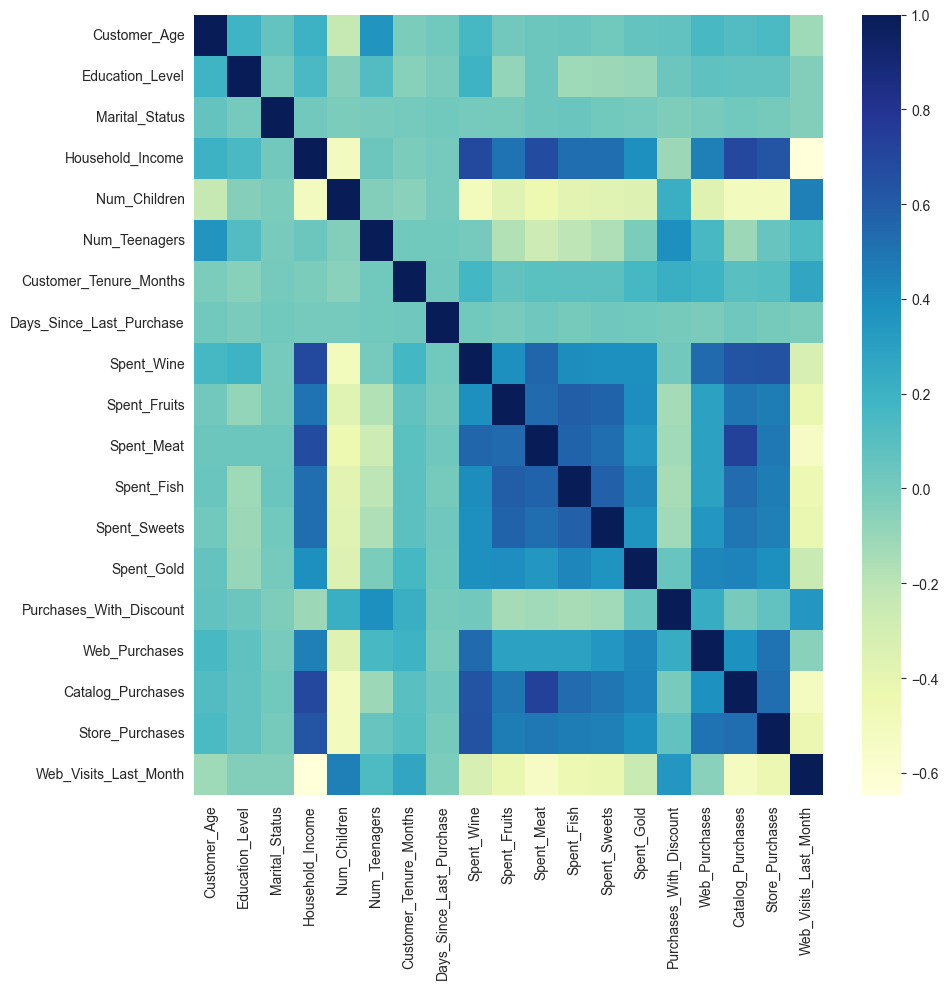

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='YlGnBu')
plt.tight_layout()
plt.show()

**Filter for high correlations only**

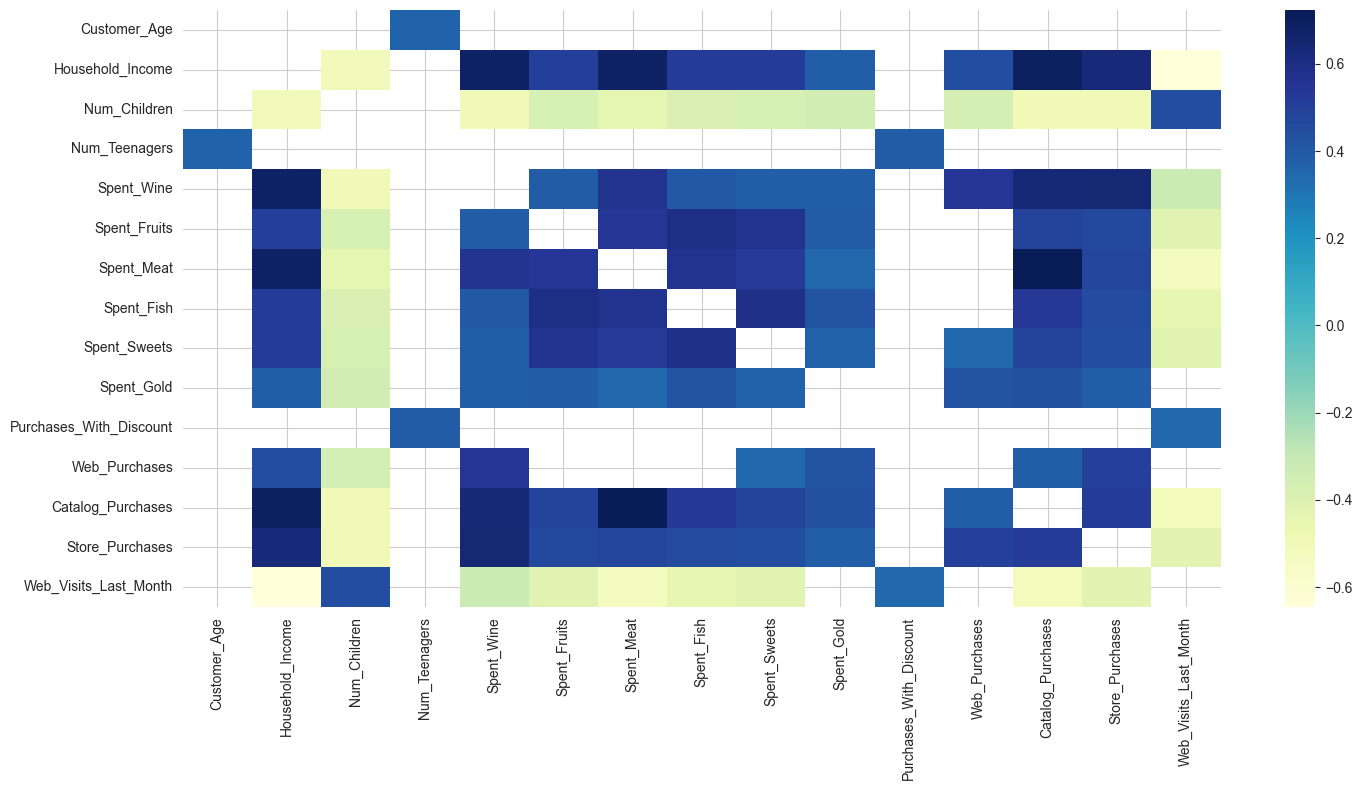

Customer_Age  Household_Income  Num_Children  \
Customer_Age                      NaN               NaN           NaN   
Household_Income                  NaN               NaN     -0.509539   
Num_Children                      NaN         -0.509539           NaN   
Num_Teenagers                 0.36335               NaN           NaN   
Spent_Wine                        NaN          0.685457     -0.496367   
Spent_Fruits                      NaN          0.504696     -0.372488   
Spent_Meat                        NaN          0.683060     -0.437059   
Spent_Fish                        NaN          0.518052     -0.387536   
Spent_Sweets                      NaN          0.517881     -0.370656   
Spent_Gold                        NaN          0.383372     -0.349633   
Purchases_With_Discount           NaN               NaN           NaN   
Web_Purchases                     NaN          0.450609     -0.362063   
Catalog_Purchases                 NaN          0.693367     -0.502438   
Store_Purchases                   NaN          0.627679     -0.500387   
Web_Visits_Last_Month             NaN         -0.646111      0.447641   

                         Num_Teenagers  Spent_Wine  Spent_Fruits  Spent_Meat  \
Customer_Age                  0.363350         NaN           NaN         NaN   
Household_Income                   NaN    0.685457      0.504696    0.683060   
Num_Children                       NaN   -0.496367     -0.372488   -0.437059   
Num_Teenagers                      NaN         NaN           NaN         NaN   
Spent_Wine                         NaN         NaN      0.388518    0.561993   
Spent_Fruits                       NaN    0.388518           NaN    0.542057   
Spent_Meat                         NaN    0.561993      0.542057         NaN   
Spent_Fish                         NaN    0.399073      0.594438    0.567880   
Spent_Sweets                       NaN    0.385992      0.567054    0.523418   
Spent_Gold                         NaN    0.386376      0.390042    0.348845   
Purchases_With_Discount       0.387792         NaN           NaN         NaN   
Web_Purchases                      NaN    0.542177           NaN         NaN   
Catalog_Purchases                  NaN    0.634784      0.487307    0.723519   
Store_Purchases                    NaN    0.642433      0.463168    0.480110   
Web_Visits_Last_Month              NaN   -0.320337     -0.417427   -0.539203   

                         Spent_Fish  Spent_Sweets  Spent_Gold  \
Customer_Age                    NaN           NaN         NaN   
Household_Income           0.518052      0.517881    0.383372   
Num_Children              -0.387536     -0.370656   -0.349633   
Num_Teenagers                   NaN           NaN         NaN   
Spent_Wine                 0.399073      0.385992    0.386376   
Spent_Fruits               0.594438      0.567054    0.390042   
Spent_Meat                 0.567880      0.523418    0.348845   
Spent_Fish                      NaN      0.579553    0.422103   
Spent_Sweets               0.579553           NaN    0.369193   
Spent_Gold                 0.422103      0.369193         NaN   
Purchases_With_Discount         NaN           NaN         NaN   
Web_Purchases                   NaN      0.348304    0.422731   
Catalog_Purchases          0.534033      0.490497    0.436997   
Store_Purchases            0.460099      0.448801    0.383264   
Web_Visits_Last_Month     -0.445760     -0.423249         NaN   

                         Purchases_With_Discount  Web_Purchases  \
Customer_Age                                 NaN            NaN   
Household_Income                             NaN       0.450609   
Num_Children                                 NaN      -0.362063   
Num_Teenagers                           0.387792            NaN   
Spent_Wine                                   NaN       0.542177   
Spent_Fruits                                 NaN            NaN   
Spent_Meat                                   NaN            NaN  

In [47]:
high_corr = corr.where(abs(corr) > 0.3)
high_corr = high_corr.where(~(high_corr == 1.0))
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(15, 8))
sns.heatmap(high_corr, annot=False, cmap='YlGnBu')
plt.tight_layout()
plt.show()

high_corr

### Visualize results as table

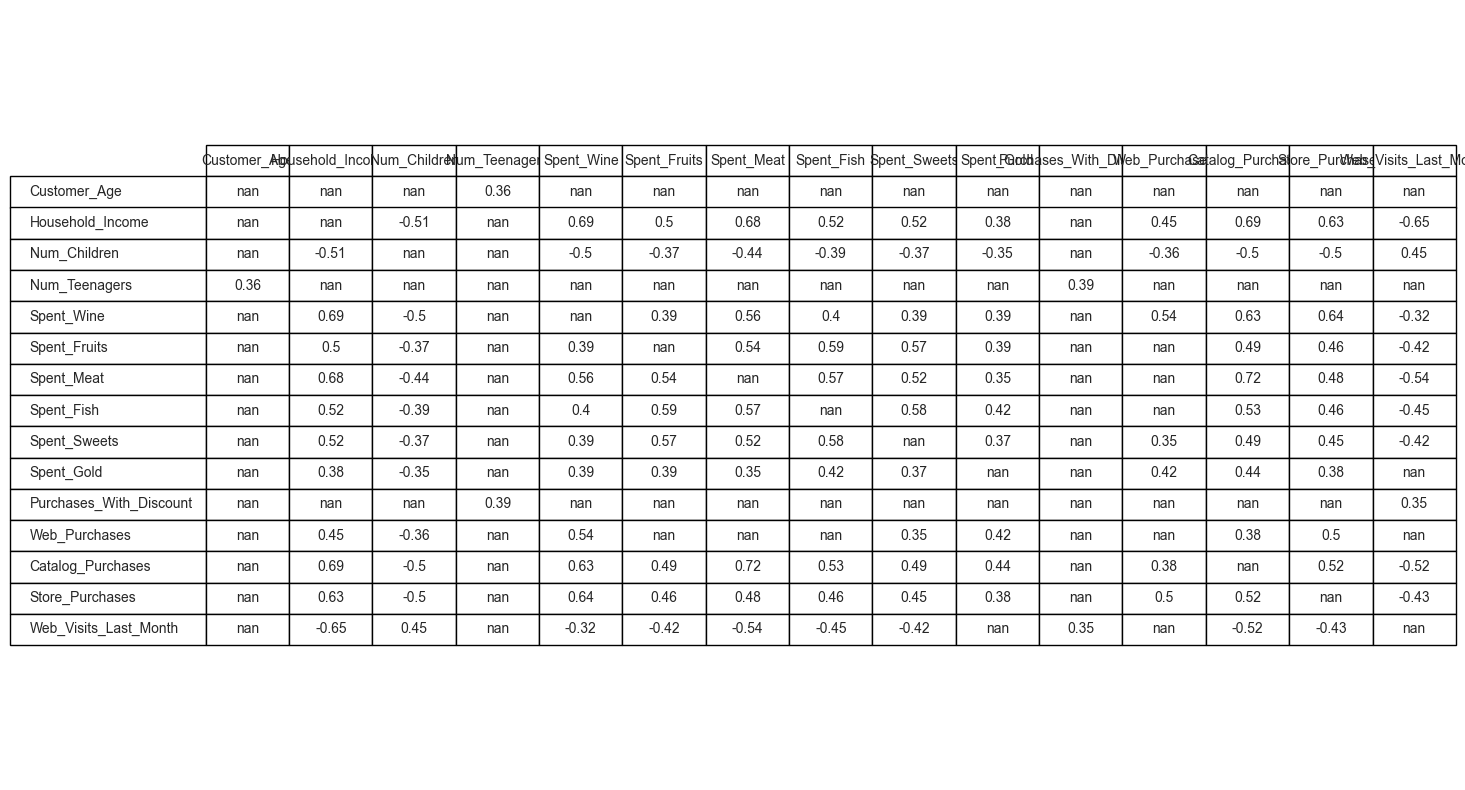

In [48]:
# Format the values to 1 decimal place
formatted_values = high_corr.round(2).values.astype(str)

plt.figure(figsize=(15, 8))
ax = plt.gca()
ax.axis('off')  # Hide axes

# Draw the table with formatted values
table = plt.table(cellText=formatted_values,
                  colLabels=high_corr.columns,
                  rowLabels=high_corr.index,
                  loc='center',
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.tight_layout()
plt.show()

### Visualize interactions on pairplot

Due to high amount of features, the researcher divides them into 2 main categories, according to interactions investigated:
* Shopping category
* Shopping behavior

**Shopping category analysis**

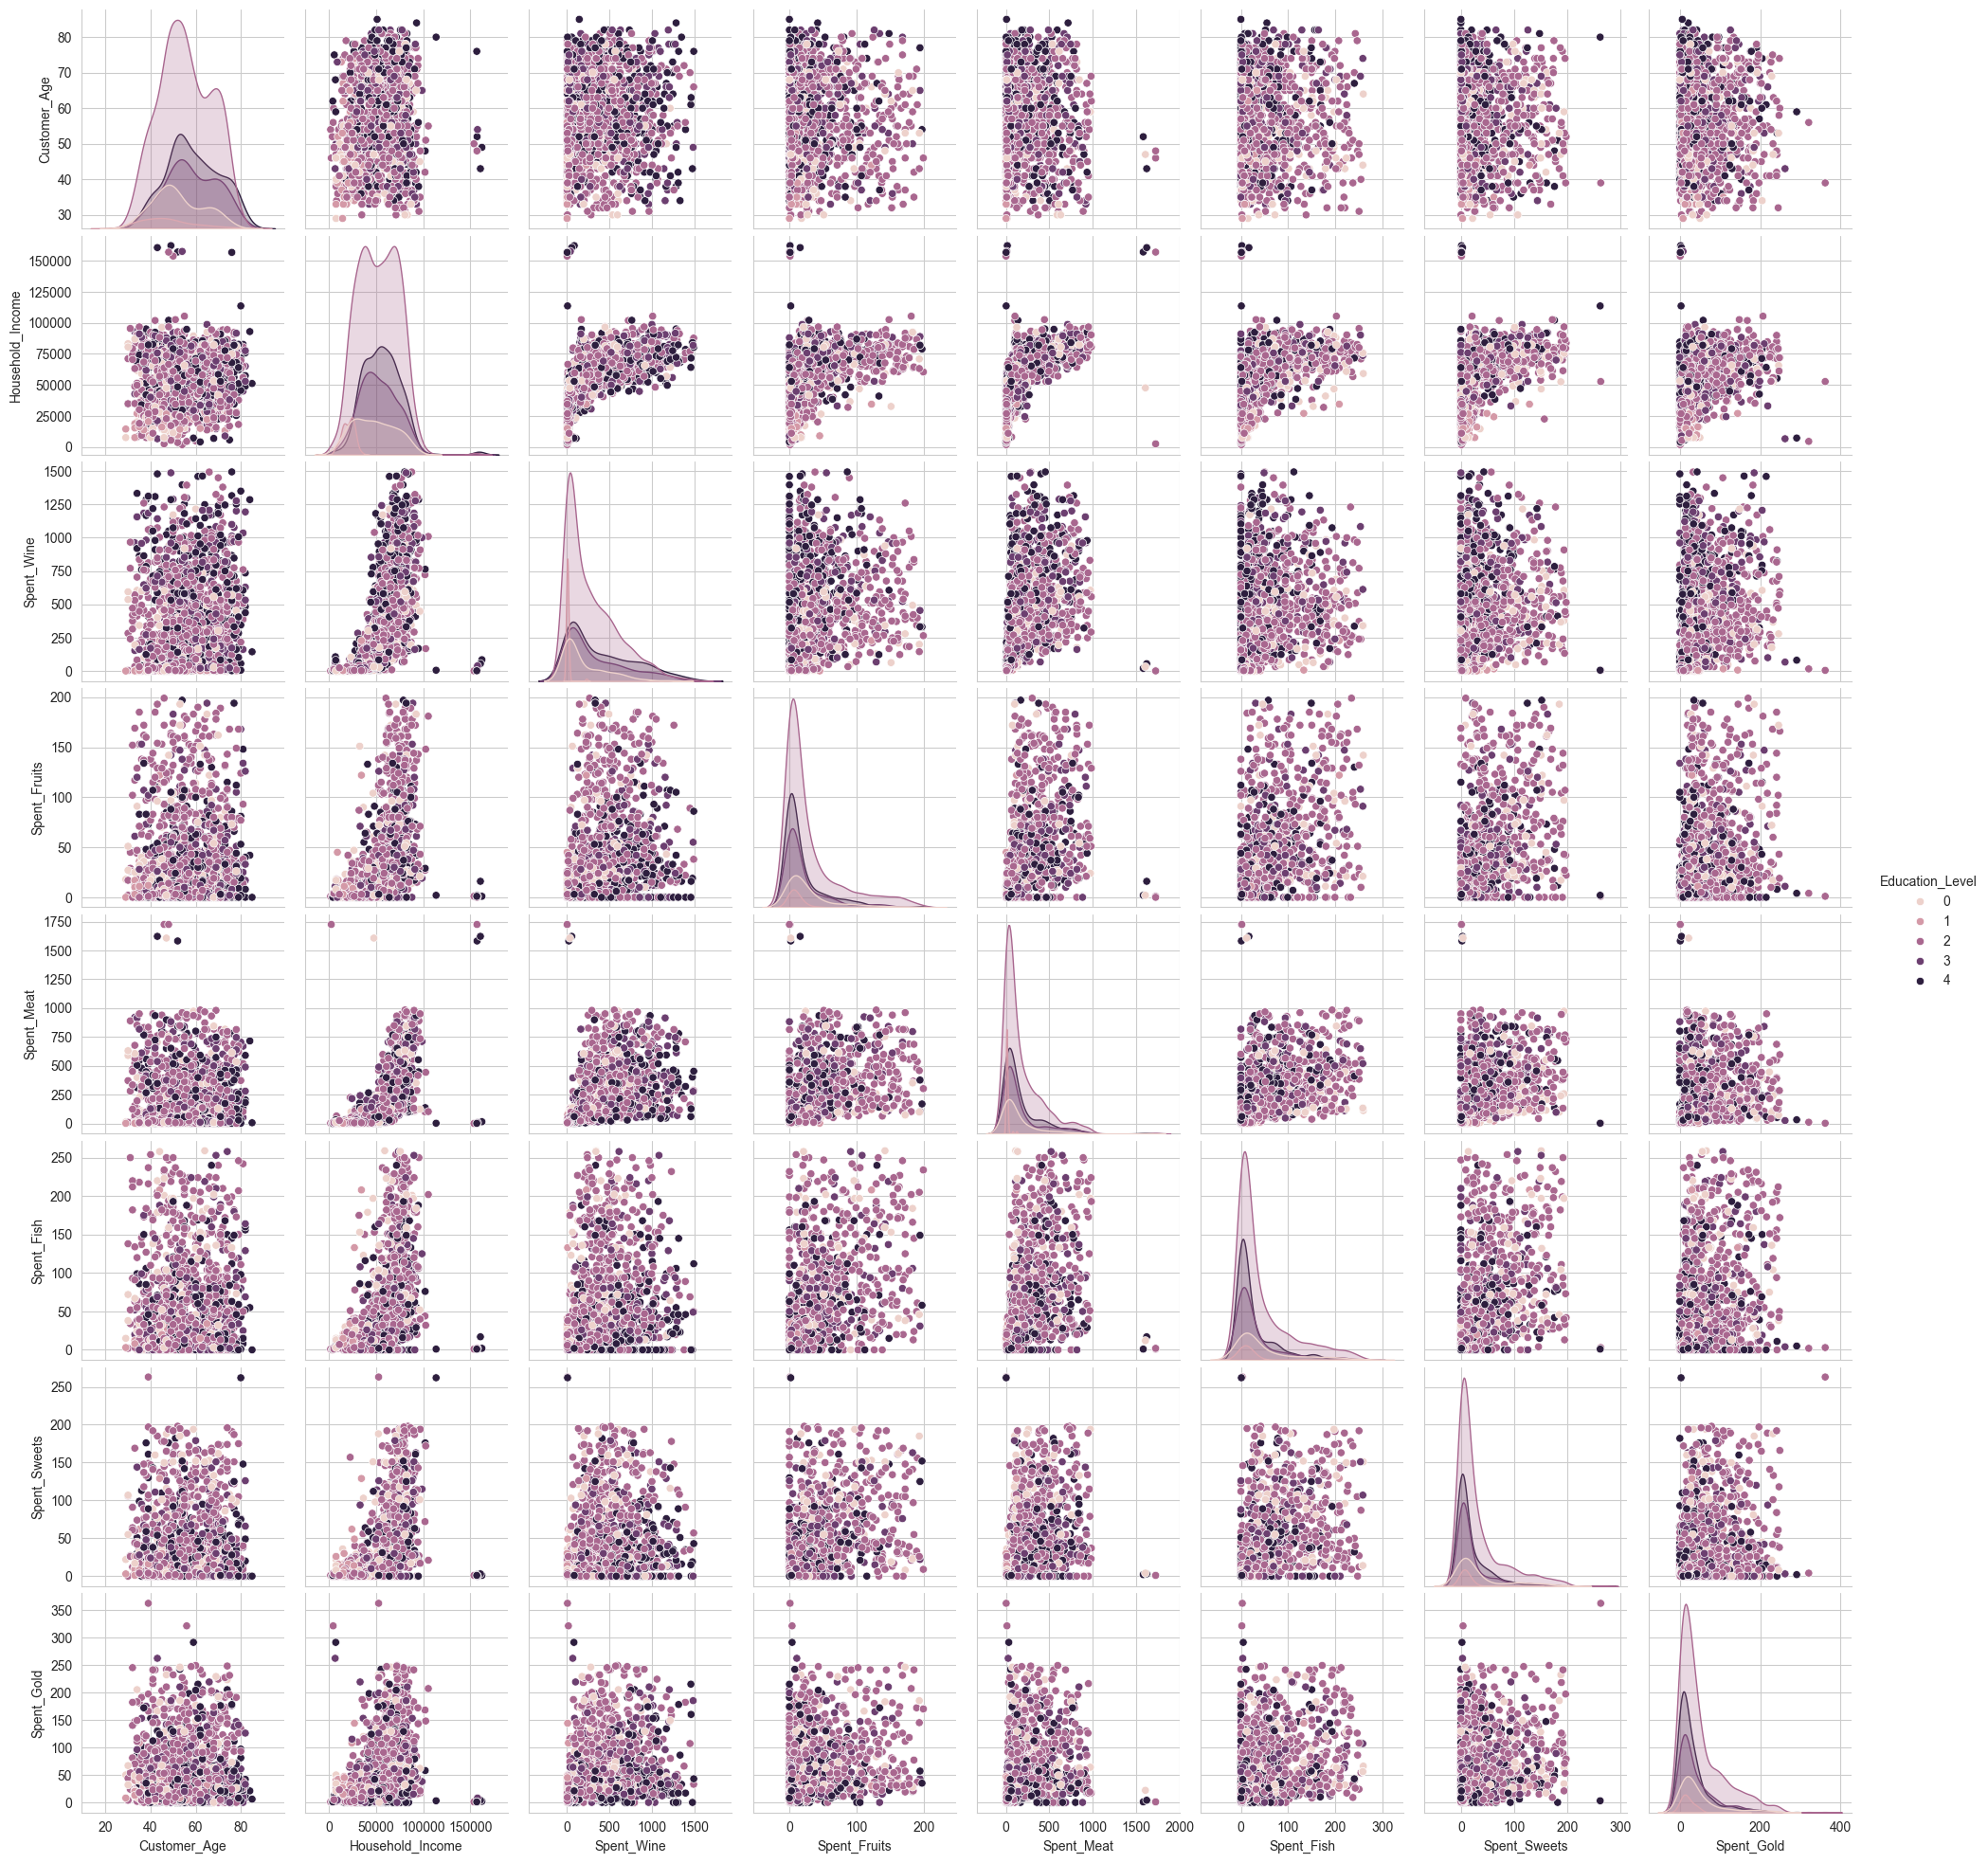

In [49]:
shopping_cat = customer_df[
    ['Customer_Age', 'Education_Level', 'Household_Income', 'Spent_Wine', 'Spent_Fruits', 'Spent_Meat', 'Spent_Fish',
     'Spent_Sweets', 'Spent_Gold']]

sns.pairplot(shopping_cat, hue='Education_Level', height=2.5)
plt.show()

**Shopping behavior analysis**

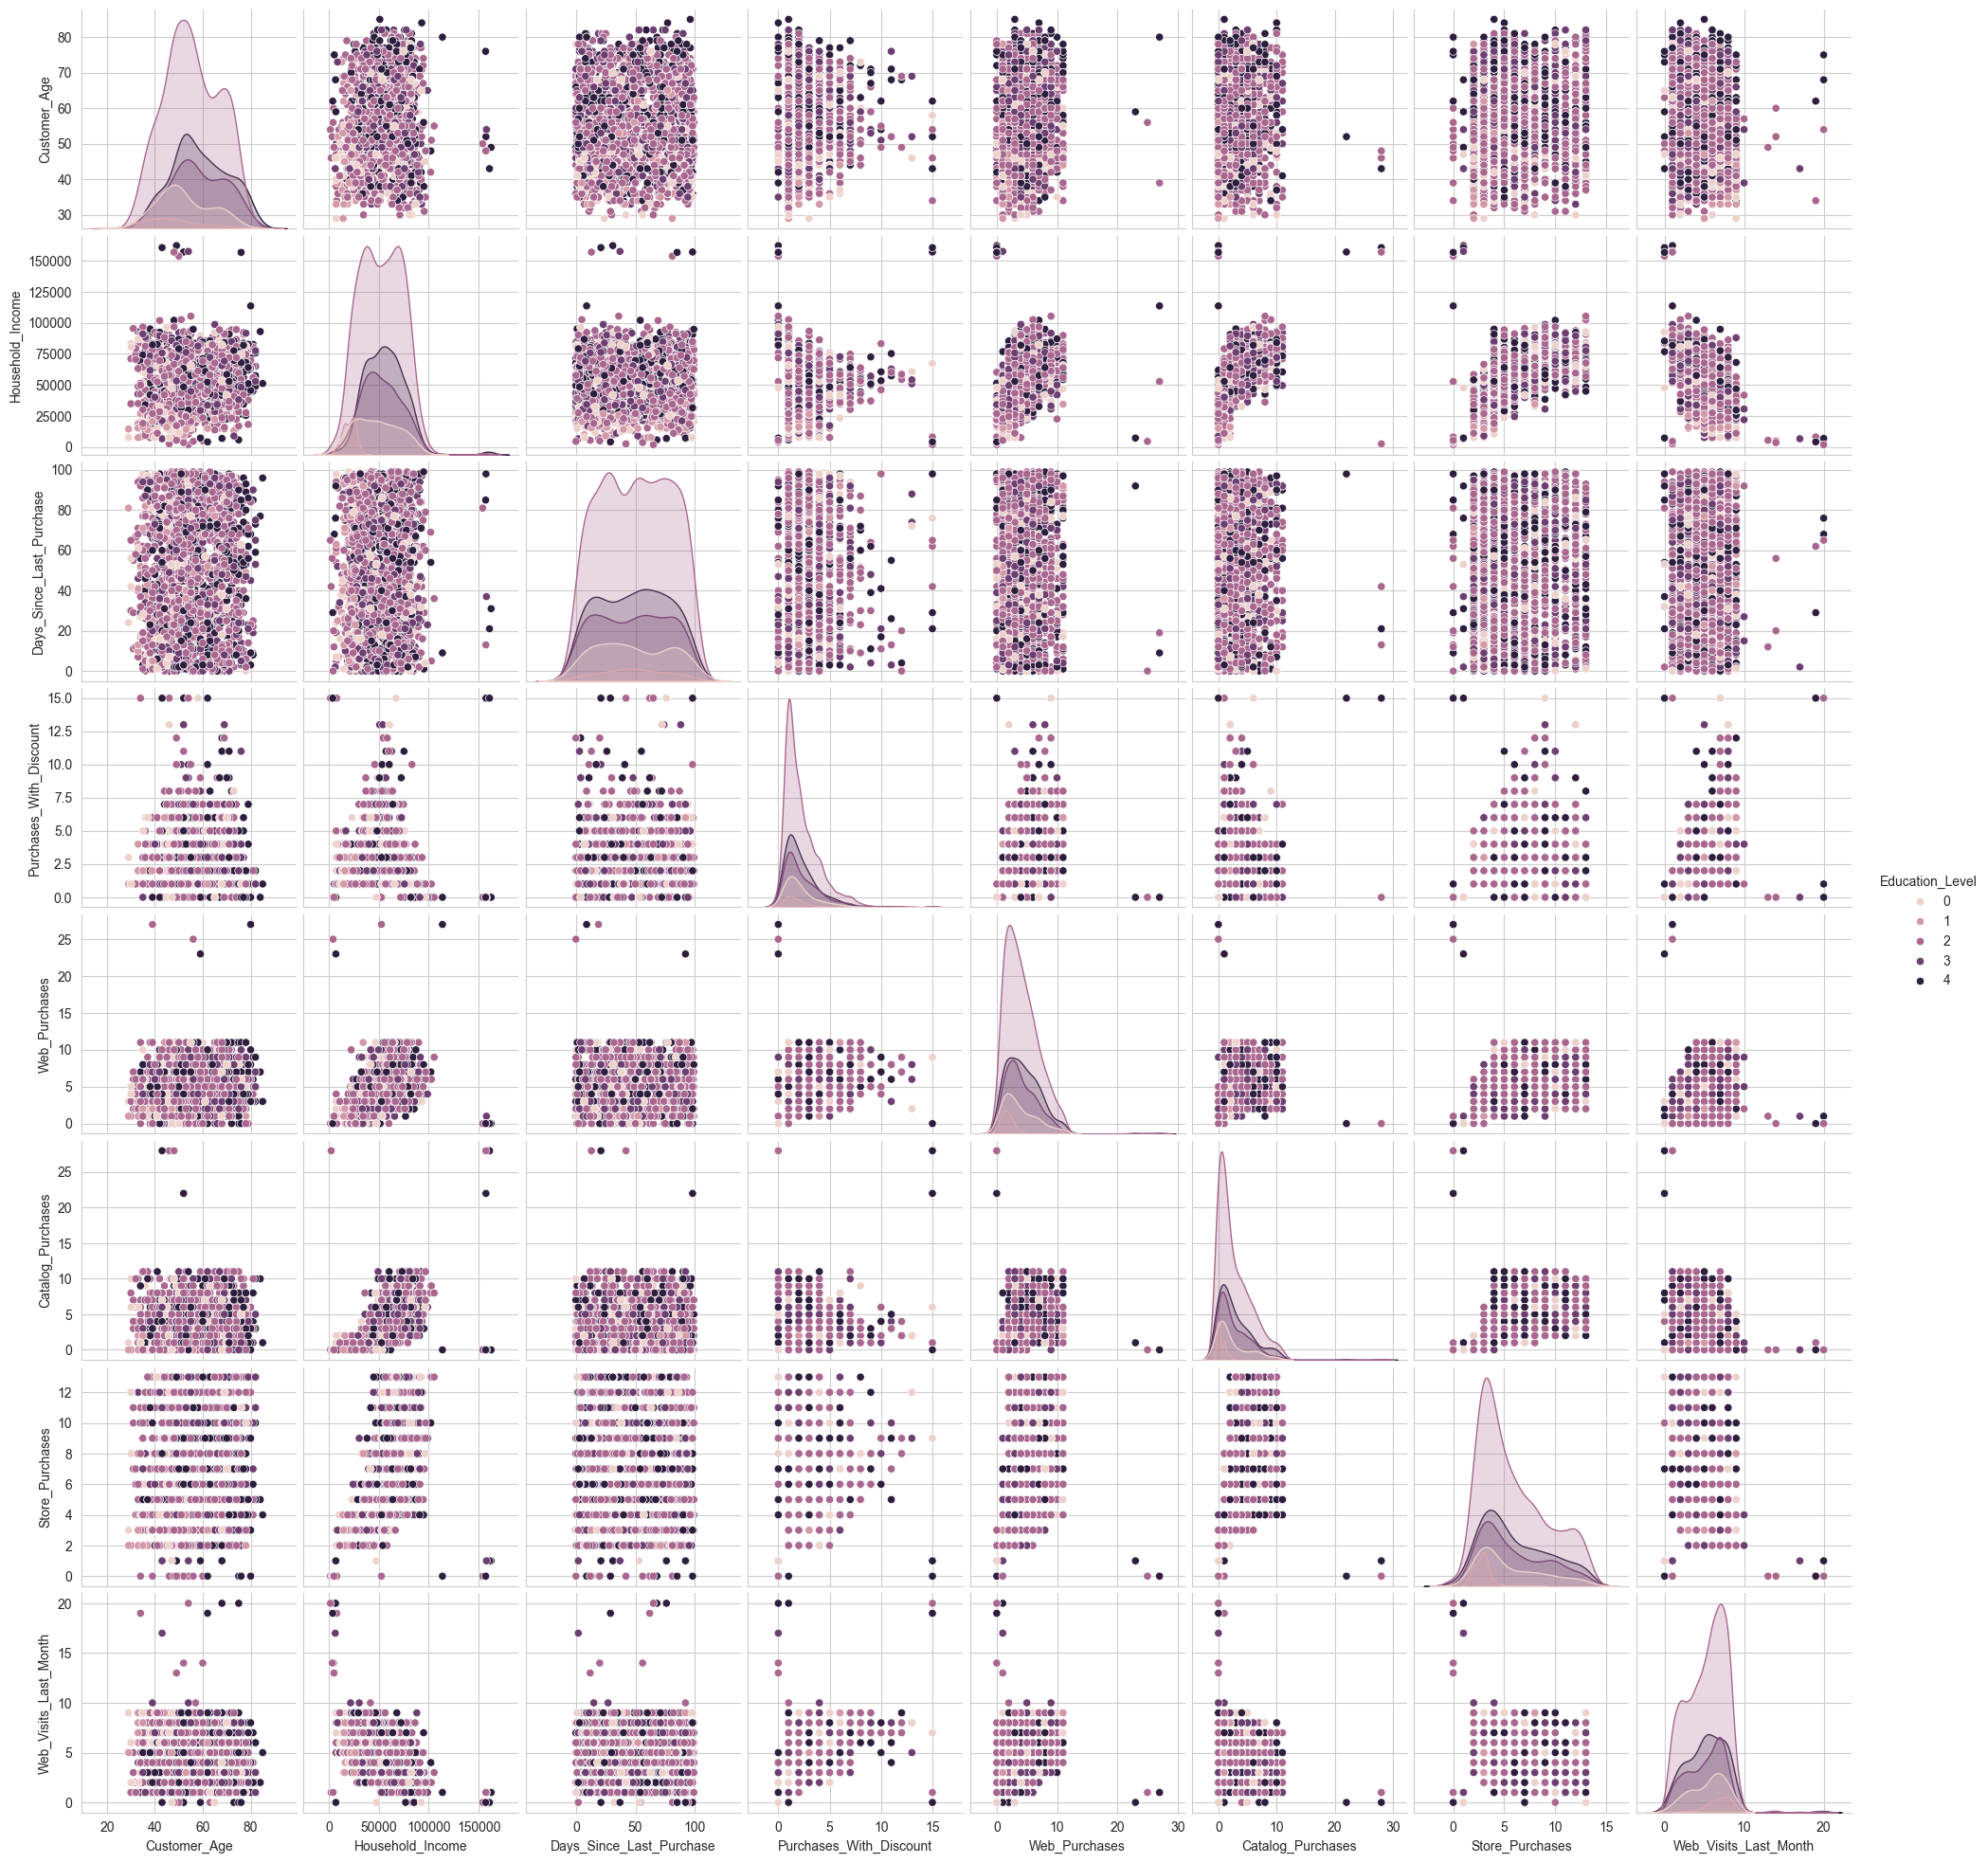

In [50]:
shopping_behavior = customer_df[
    ['Customer_Age', 'Education_Level', 'Household_Income', 'Days_Since_Last_Purchase', 'Purchases_With_Discount',
     'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Last_Month']]

sns.pairplot(shopping_behavior, hue='Education_Level', height=2.5)
plt.show()

### Multivariate analysis summary

#### Household Income
- **Strong positive correlation** with:
  - `Spent_Wine` (0.69)
  - `Spent_Meat` (0.68)
  - `Catalog_Purchases` (0.69)
  - `Store_Purchases` (0.63)
- **Moderate positive correlation** with:
  - `Spent_Fruits`, `Spent_Fish`, `Spent_Sweets`, `Spent_Gold`, `Web_Purchases` (0.45–0.52)
- **Negative correlation** with:
  - `Web_Visits_Last_Month` (-0.65)
  - `Num_Children` (-0.51)

#### Children & Teenagers
- `Num_Children`:
  - **Negative correlation** with most spending and purchase channels (~ -0.35 to -0.50)
- `Num_Teenagers`:
  - Weak **positive correlation** with `Customer_Age` (0.36)
  - Weak **positive correlation** with `Purchases_With_Discount` (0.39)

#### Spent on Wine
- **Strong positive correlation** with:
  - `Spent_Meat` (0.56)
  - `Catalog_Purchases` (0.63)
  - `Store_Purchases` (0.64)
  - `Web_Purchases` (0.54)
- Indicates high-value omnichannel shoppers

#### Spent on Meat
- Strong correlations with:
  - `Spent_Fruits`, `Spent_Fish`, `Spent_Sweets` (0.52–0.57)
  - `Catalog_Purchases` (0.72)
  - `Household_Income` (0.68)

#### Catalog Purchases
- Highest correlations:
  - `Spent_Meat` (0.72)
  - `Spent_Wine` (0.63)
  - `Spent_Fish`, `Spent_Sweets` (0.49–0.53)
  - `Store_Purchases` (0.52)
- Tied closely to higher income and food spending

#### Other Observations
- `Web_Visits_Last_Month`:
  - **Negatively correlated** with income and spending — high-income consumers browse less but buy more
- `Purchases_With_Discount`:
  - Weak links to `Num_Teenagers` and `Web_Visits`

## Step 5: Machine learning model

The aim is to identify key customer clusters for segmentation and targeting
* Perform PCA to select features
* Apply K-Means algorithm
* Apply cluster assigned back to original dataset to spot trends
* Analyze new dataset to spot patterns

### Feature selection with PCA

**1) Drop irrelevant features according to correlation analysis**

To further reduce model complexity and prevent overfitting, information from the correlation analysis is used to decide on features to drop (as less relevant), namely:
* Purchase with discount

Further, information on number of kids and teenagers is combined into a new single feature for "Number of kids"

In [51]:
customer_df.columns

Index(['Customer_Age', 'Education_Level', 'Marital_Status', 'Household_Income',
       'Num_Children', 'Num_Teenagers', 'Customer_Tenure_Months',
       'Days_Since_Last_Purchase', 'Spent_Wine', 'Spent_Fruits', 'Spent_Meat',
       'Spent_Fish', 'Spent_Sweets', 'Spent_Gold', 'Purchases_With_Discount',
       'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases',
       'Web_Visits_Last_Month'],
      dtype='object')

In [52]:
# Delete irrelevant information
customer_df.drop(columns='Purchases_With_Discount', axis=1, inplace=True)

# Merge kids information
customer_df['Num_Kids'] = customer_df['Num_Children'] + customer_df['Num_Teenagers']
customer_df.drop(columns=['Num_Children', 'Num_Teenagers'], axis=1, inplace=True)
customer_df.head()

Customer_Age  Education_Level  Marital_Status  Household_Income  \
0            68                2               4           58138.0   
1            71                2               4           46344.0   
2            60                2               5           71613.0   
3            41                2               5           26646.0   
4            44                4               3           58293.0   

   Customer_Tenure_Months  Days_Since_Last_Purchase  Spent_Wine  Spent_Fruits  \
0                     155                        58         635            88   
1                     136                        38          11             1   
2                     143                        26         426            49   
3                     137                        26          11             4   
4                     138                        94         173            43   

   Spent_Meat  Spent_Fish  Spent_Sweets  Spent_Gold  Web_Purchases  \
0         546         172            88          88              8   
1           6           2             1           6              1   
2         127         111            21          42              8   
3          20          10             3           5              2   
4         118          46            27          15              5   

   Catalog_Purchases  Store_Purchases  Web_Visits_Last_Month  Num_Kids  
0                 10                4                      7         0  
1                  1                2                      5         2  
2                  2               10                      4         0  
3                  0                4                      6         1  
4                  3                6                      5         1

In [53]:
# Define desired column order
ordered_columns = [
    # Demographics
    'Customer_Age',
    'Education_Level',
    'Marital_Status',
    'Household_Income',
    'Num_Kids',

    # Engagement
    'Customer_Tenure_Months',
    'Days_Since_Last_Purchase',

    # Spending Behavior
    'Spent_Wine',
    'Spent_Fruits',
    'Spent_Meat',
    'Spent_Fish',
    'Spent_Sweets',
    'Spent_Gold',

    # Purchase Channels
    'Web_Purchases',
    'Catalog_Purchases',
    'Store_Purchases',
    'Web_Visits_Last_Month'
]

# Reorder the DataFrame
customer_df = customer_df[ordered_columns]


**2) Standardize data using StandardScaler**

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_df_scaled = pd.DataFrame(scaler.fit_transform(customer_df), columns=customer_df.columns)
customer_df_scaled.head()

Customer_Age  Education_Level  Marital_Status  Household_Income  Num_Kids  \
0      1.017296        -0.352044        0.249868          0.287922 -1.264618   
1      1.273722        -0.352044        0.249868         -0.263053  1.395420   
2      0.333495        -0.352044        1.192456          0.917428 -1.264618   
3     -1.290534        -0.352044        1.192456         -1.183276  0.065401   
4     -1.034108         1.429682       -0.692720          0.295163  0.065401   

   Customer_Tenure_Months  Days_Since_Last_Purchase  Spent_Wine  Spent_Fruits  \
0                1.599062                  0.307272    0.983671      1.554623   
1               -1.258648                 -0.383584   -0.870717     -0.636422   
2               -0.205808                 -0.798098    0.362570      0.572430   
3               -1.108243                 -0.798098   -0.870717     -0.560868   
4               -0.957837                  1.550812   -0.389289      0.421324   

   Spent_Meat  Spent_Fish  Spent_Sweets  Spent_Gold  Web_Purchases  \
0    1.680253    2.461700      1.475877    0.846061       1.408080   
1   -0.713250   -0.650275     -0.631440   -0.729569      -1.110957   
2   -0.176928    1.345050     -0.147000   -0.037829       1.408080   
3   -0.651196   -0.503829     -0.582996   -0.748784      -0.751094   
4   -0.216820    0.155177     -0.001667   -0.556634       0.328493   

   Catalog_Purchases  Store_Purchases  Web_Visits_Last_Month  
0           2.510435        -0.552077               0.692882  
1          -0.568802        -1.167421              -0.131574  
2          -0.226664         1.293956              -0.543802  
3          -0.910939        -0.552077               0.280654  
4           0.115473         0.063267              -0.131574

**3) Apply PCA for feature selection**

In [55]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customer_df_scaled)

# Deciding on number of features to keep based on cumulative variance plot
# The following attribute shows how much variance is explained by each individual component
pca.explained_variance_ratio_

array([0.35955683, 0.09068244, 0.08428291, 0.0612302 , 0.05808199,
       0.05426235, 0.04464285, 0.03881545, 0.03670312, 0.03378087,
       0.02848959, 0.02570406, 0.0231525 , 0.01956648, 0.01609874,
       0.01494266, 0.01000694])

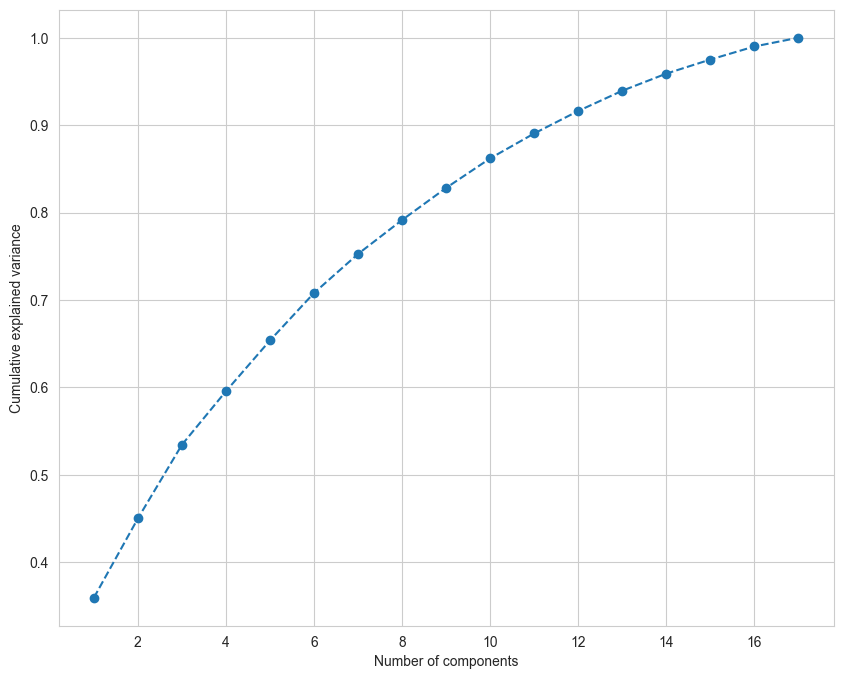

In [56]:
# Depicting variance plot to select optimal number of components
plt.figure(figsize=(10, 8))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Re-run PCA with 8 components to retain at least 80% of variance

In [57]:
pca = PCA(n_components=8)
scores_pca = pca.fit_transform(customer_df_scaled)
scores_pca

array([[ 3.96182667e+00,  7.45690022e-02,  1.92091272e+00, ...,
        -2.45836439e-01,  1.78074168e+00,  1.26175530e-01],
       [-2.37454941e+00, -9.31584022e-02, -1.61420666e+00, ...,
         1.36241417e+00,  5.02629400e-01, -1.13697018e-01],
       [ 1.95075278e+00,  6.86198859e-02, -4.03018985e-03, ...,
         2.23509040e-01, -6.73705171e-01, -2.38312180e-04],
       ...,
       [ 1.27479500e+00, -4.68845470e-01, -2.31195115e-01, ...,
        -6.32276191e-01, -9.66723572e-01, -3.90354119e-01],
       [ 1.88592125e+00,  7.88592592e-01, -1.40889538e+00, ...,
         6.52049109e-01, -4.15837373e-01, -8.87949721e-02],
       [-1.78783150e+00,  1.97341003e+00, -1.60382239e-01, ...,
         8.51111259e-02,  1.55819646e+00,  5.47111306e-01]],
      shape=(2237, 8))

**4) Apply K-Means for clustering**

**Notes on Elbow Method:**

WCSS stands for Within-Cluster Sum of Squares.

In plain terms:

* It measures the total squared distance between each point and the centroid of its cluster.

* The idea: we want data points in the same cluster to be as close to each other (and to their centroid) as possible — so lower WCSS is better.


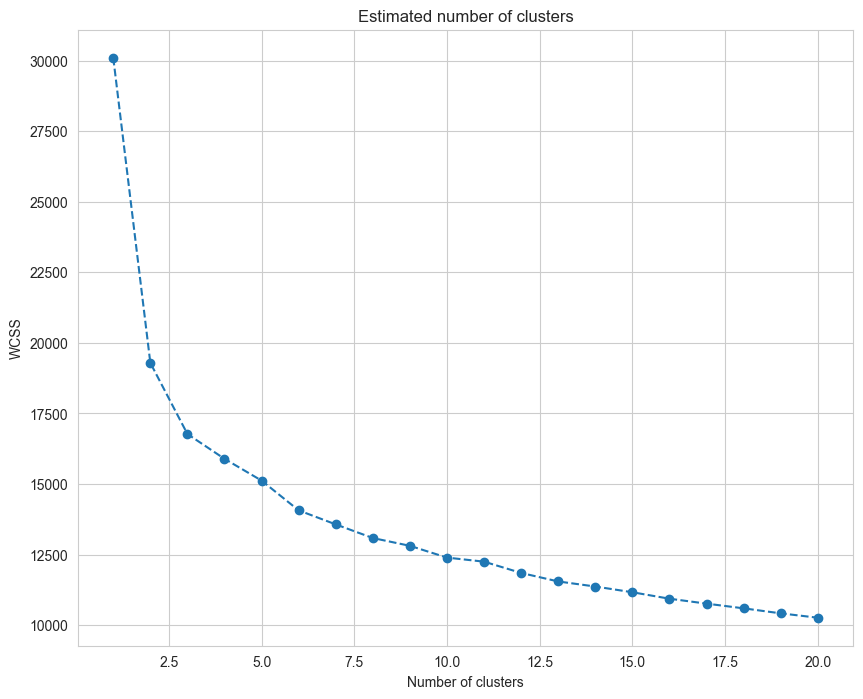

In [58]:
from sklearn.cluster import KMeans

# Use elbow method to find optimal number of clusters based on WCSS (Within Cluster Sum of Squares
wcss = []
for k in range(1, 21):
    kmeans_pca = KMeans(n_clusters=k, init='k-means++', random_state=17)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Estimated number of clusters')
plt.show()

We can now apply K-Means with 3 as number of clusters K

In [59]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=17)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=17)

**5) Create new dataframe with PCA components and predicted clusters**

In [60]:
customer_segment_df = pd.concat([customer_df_scaled.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)

In [61]:
# Rename component columns
customer_segment_df.columns.values[-8:] = ['Component_1', 'Component_2', 'Component_3', 'Component_4', 'Component_5',
                                           'Component_6', 'Component_7', 'Component_8']

# Assign predicted segment to each customer
customer_segment_df['K_Means_Segment'] = kmeans_pca.labels_
customer_segment_df.head()

Customer_Age  Education_Level  Marital_Status  Household_Income  Num_Kids  \
0      1.017296        -0.352044        0.249868          0.287922 -1.264618   
1      1.273722        -0.352044        0.249868         -0.263053  1.395420   
2      0.333495        -0.352044        1.192456          0.917428 -1.264618   
3     -1.290534        -0.352044        1.192456         -1.183276  0.065401   
4     -1.034108         1.429682       -0.692720          0.295163  0.065401   

   Customer_Tenure_Months  Days_Since_Last_Purchase  Spent_Wine  Spent_Fruits  \
0                1.599062                  0.307272    0.983671      1.554623   
1               -1.258648                 -0.383584   -0.870717     -0.636422   
2               -0.205808                 -0.798098    0.362570      0.572430   
3               -1.108243                 -0.798098   -0.870717     -0.560868   
4               -0.957837                  1.550812   -0.389289      0.421324   

   Spent_Meat  Spent_Fish  Spent_Sweets  Spent_Gold  Web_Purchases  \
0    1.680253    2.461700      1.475877    0.846061       1.408080   
1   -0.713250   -0.650275     -0.631440   -0.729569      -1.110957   
2   -0.176928    1.345050     -0.147000   -0.037829       1.408080   
3   -0.651196   -0.503829     -0.582996   -0.748784      -0.751094   
4   -0.216820    0.155177     -0.001667   -0.556634       0.328493   

   Catalog_Purchases  Store_Purchases  Web_Visits_Last_Month  Component_1  \
0           2.510435        -0.552077               0.692882     3.961827   
1          -0.568802        -1.167421              -0.131574    -2.374549   
2          -0.226664         1.293956              -0.543802     1.950753   
3          -0.910939        -0.552077               0.280654    -2.376273   
4           0.115473         0.063267              -0.131574     0.020217   

   Component_2  Component_3  Component_4  Component_5  Component_6  \
0     0.074569     1.920913     0.838979    -0.173208    -0.245836   
1    -0.093158    -1.614207     0.417438    -0.549335     1.362414   
2     0.068620    -0.004030     0.295521    -1.522931     0.223509   
3    -1.342150    -0.391636     0.104593    -1.236031    -0.561501   
4    -0.058106    -0.921611    -0.113656     1.793857    -0.572306   

   Component_7  Component_8  K_Means_Segment  
0     1.780742     0.126176                0  
1     0.502629    -0.113697                1  
2    -0.673705    -0.000238                2  
3    -1.106635     0.131621                1  
4    -1.003212     1.214132                2

**9) Visualize customer segments**

Since 8 clusters were selected (to maintain 80% of explained variance), only **2 most relevant** must be selected for visualization (although all used for computations)

CA orders components by the amount of variance they capture from the data.

* Component 1 captures the most variance.
* Component 2 captures the second most variance, and it's orthogonal (uncorrelated) to Component 1.

These two typically hold the most "informative" structure of your dataset.

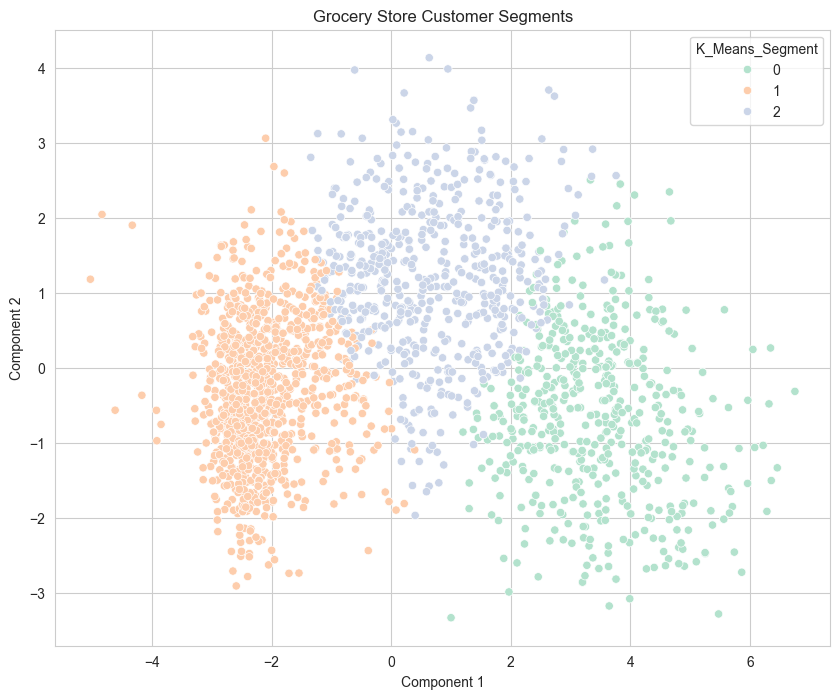

In [62]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=customer_segment_df['Component_1'],
    y=customer_segment_df['Component_2'],
    hue=customer_segment_df['K_Means_Segment'],
    palette='Pastel2'
)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Grocery Store Customer Segments')
plt.show()

## Step 6: Analyze segments

This step involves analyzing segments to highlight key traits and purchase behavior

In [63]:
# Create new dataset excluding components
segments_df = customer_segment_df.drop(
    columns=['Component_1', 'Component_2', 'Component_3', 'Component_4', 'Component_5', 'Component_6', 'Component_7',
             'Component_8'], inplace=False)
segments_df = pd.concat([customer_df.reset_index(drop=True), pd.DataFrame(customer_segment_df['K_Means_Segment'])], axis=1)
segments_df.head()

Customer_Age  Education_Level  Marital_Status  Household_Income  Num_Kids  \
0            68                2               4           58138.0         0   
1            71                2               4           46344.0         2   
2            60                2               5           71613.0         0   
3            41                2               5           26646.0         1   
4            44                4               3           58293.0         1   

   Customer_Tenure_Months  Days_Since_Last_Purchase  Spent_Wine  Spent_Fruits  \
0                     155                        58         635            88   
1                     136                        38          11             1   
2                     143                        26         426            49   
3                     137                        26          11             4   
4                     138                        94         173            43   

   Spent_Meat  Spent_Fish  Spent_Sweets  Spent_Gold  Web_Purchases  \
0         546         172            88          88              8   
1           6           2             1           6              1   
2         127         111            21          42              8   
3          20          10             3           5              2   
4         118          46            27          15              5   

   Catalog_Purchases  Store_Purchases  Web_Visits_Last_Month  K_Means_Segment  
0                 10                4                      7                0  
1                  1                2                      5                1  
2                  2               10                      4                2  
3                  0                4                      6                1  
4                  3                6                      5                2

In [64]:
# Group customers by cluster

segment_0 = segments_df[segments_df['K_Means_Segment'] == 0]
segment_1 = segments_df[segments_df['K_Means_Segment'] == 1]
segment_2 = segments_df[segments_df['K_Means_Segment'] == 2]
print(f'Number of customers in segment 0: {len(segment_0)}')
print(f'Number of customers in segment 1: {len(segment_1)}')
print(f'Number of customers in segment 2: {len(segment_2)}')

Number of customers in segment 0: 557
Number of customers in segment 1: 1088
Number of customers in segment 2: 592


**Descriptive statistics segment 0**

In [65]:
segment_0.describe().T

count          mean           std     min      25%  \
Customer_Age              557.0     56.283662     13.161092    30.0     46.0   
Education_Level           557.0      2.256732      1.101248     0.0      2.0   
Marital_Status            557.0      3.845601      1.060000     2.0      3.0   
Household_Income          557.0  75835.789946  12202.321702  2447.0  69719.0   
Num_Kids                  557.0      0.233393      0.456092     0.0      0.0   
Customer_Tenure_Months    557.0    144.626571      6.793237   133.0    139.0   
Days_Since_Last_Purchase  557.0     50.472172     29.287794     0.0     25.0   
Spent_Wine                557.0    587.129264    306.106263     1.0    350.0   
Spent_Fruits              557.0     71.287253     51.061608     0.0     28.0   
Spent_Meat                557.0    464.691203    252.664096    74.0    276.0   
Spent_Fish                557.0    103.748654     65.691107     0.0     50.0   
Spent_Sweets              557.0     74.078995     51.588865     0.0     32.0   
Spent_Gold                557.0     78.380610     60.252187     0.0     32.0   
Web_Purchases             557.0      5.136445      2.213282     0.0      4.0   
Catalog_Purchases         557.0      6.062837      2.920654     0.0      4.0   
Store_Purchases           557.0      8.520646      2.892875     0.0      6.0   
Web_Visits_Last_Month     557.0      2.773788      1.738010     0.0      1.0   
K_Means_Segment           557.0      0.000000      0.000000     0.0      0.0   

                              50%      75%       max  
Customer_Age                 56.0     67.0      84.0  
Education_Level               2.0      3.0       4.0  
Marital_Status                4.0      5.0       6.0  
Household_Income          75922.0  82072.0  160803.0  
Num_Kids                      0.0      0.0       3.0  
Customer_Tenure_Months      146.0    150.0     156.0  
Days_Since_Last_Purchase     54.0     76.0      99.0  
Spent_Wine                  543.0    796.0    1493.0  
Spent_Fruits                 60.0    107.0     199.0  
Spent_Meat                  424.0    607.0    1725.0  
Spent_Fish                   94.0    150.0     259.0  
Spent_Sweets                 61.0    108.0     198.0  
Spent_Gold                   57.0    112.0     249.0  
Web_Purchases                 5.0      6.0      11.0  
Catalog_Purchases             6.0      7.0      28.0  
Store_Purchases               9.0     11.0      13.0  
Web_Visits_Last_Month         2.0      4.0       9.0  
K_Means_Segment               0.0      0.0       0.0

**Descriptive statistics segment 1**

In [66]:
segment_1.describe().T

count          mean           std     min  \
Customer_Age              1088.0     53.801471     10.939287    29.0   
Education_Level           1088.0      2.265625      1.137402     0.0   
Marital_Status            1088.0      3.721507      1.034198     2.0   
Household_Income          1088.0  35608.006066  13988.376876  1730.0   
Num_Kids                  1088.0      1.257353      0.703481     0.0   
Customer_Tenure_Months    1088.0    143.384191      6.539204   133.0   
Days_Since_Last_Purchase  1088.0     49.349265     29.099665     0.0   
Spent_Wine                1088.0     48.513787     62.056150     0.0   
Spent_Fruits              1088.0      5.206801      7.991743     0.0   
Spent_Meat                1088.0     24.940257     26.406300     0.0   
Spent_Fish                1088.0      7.300551     10.699316     0.0   
Spent_Sweets              1088.0      5.187500      7.541468     0.0   
Spent_Gold                1088.0     15.443015     18.202138     0.0   
Web_Purchases             1088.0      2.211397      1.374421     0.0   
Catalog_Purchases         1088.0      0.587316      0.744007     0.0   
Store_Purchases           1088.0      3.322610      1.187858     0.0   
Web_Visits_Last_Month     1088.0      6.440257      1.982471     0.0   
K_Means_Segment           1088.0      1.000000      0.000000     1.0   

                               25%      50%       75%       max  
Customer_Age                 46.00     53.0     61.00      85.0  
Education_Level               2.00      2.0      3.00       4.0  
Marital_Status                3.00      4.0      5.00       6.0  
Household_Income          26490.00  35482.0  44172.50  162397.0  
Num_Kids                      1.00      1.0      2.00       3.0  
Customer_Tenure_Months      138.00    143.0    149.00     156.0  
Days_Since_Last_Purchase     24.00     49.0     76.00      99.0  
Spent_Wine                    8.00     23.0     65.25     691.0  
Spent_Fruits                  0.75      2.0      6.00      65.0  
Spent_Meat                    8.00     15.0     31.00     206.0  
Spent_Fish                    1.00      3.0     10.00     102.0  
Spent_Sweets                  0.00      2.0      7.00      78.0  
Spent_Gold                    4.00     10.0     20.00     262.0  
Web_Purchases                 1.00      2.0      3.00       9.0  
Catalog_Purchases             0.00      0.0      1.00       5.0  
Store_Purchases               3.00      3.0      4.00       9.0  
Web_Visits_Last_Month         5.00      7.0      8.00      20.0  
K_Means_Segment               1.00      1.0      1.00       1.0

**Descriptive statistics segment 2**

In [67]:
segment_2.describe().T

count          mean           std     min      25%  \
Customer_Age              592.0     60.145270     10.434349    33.0     52.0   
Education_Level           592.0      2.763514      1.031559     0.0      2.0   
Marital_Status            592.0      3.655405      1.103527     2.0      3.0   
Household_Income          592.0  59604.119932  12097.061835  4428.0  52742.5   
Num_Kids                  592.0      1.062500      0.602712     0.0      1.0   
Customer_Tenure_Months    592.0    145.934122      6.399613   133.0    141.0   
Days_Since_Last_Purchase  592.0     47.368243     28.335306     0.0     24.0   
Spent_Wine                592.0    507.135135    310.339793     2.0    274.5   
Spent_Fruits              592.0     22.626689     25.640641     0.0      5.0   
Spent_Meat                592.0    147.677365    101.360720     2.0     73.0   
Spent_Fish                592.0     30.756757     34.121287     0.0      6.0   
Spent_Sweets              592.0     23.052365     29.370651     0.0      4.0   
Spent_Gold                592.0     64.016892     56.660085     0.0     23.0   
Web_Purchases             592.0      6.547297      2.750996     0.0      5.0   
Catalog_Purchases         592.0      3.277027      2.022114     0.0      2.0   
Store_Purchases           592.0      7.771959      2.710578     0.0      6.0   
Web_Visits_Last_Month     592.0      5.653716      1.916184     0.0      4.0   
K_Means_Segment           592.0      2.000000      0.000000     2.0      2.0   

                              50%       75%       max  
Customer_Age                 60.0     69.00      82.0  
Education_Level               3.0      4.00       4.0  
Marital_Status                3.0      5.00       6.0  
Household_Income          59471.5  66343.75  156924.0  
Num_Kids                      1.0      1.00       3.0  
Customer_Tenure_Months      146.0    152.00     156.0  
Days_Since_Last_Purchase     48.0     70.00      99.0  
Spent_Wine                  443.0    667.00    1486.0  
Spent_Fruits                 14.0     32.25     142.0  
Spent_Meat                  127.0    199.00     653.0  
Spent_Fish                   19.0     45.00     188.0  
Spent_Sweets                 14.0     31.00     263.0  
Spent_Gold                   43.5     91.00     362.0  
Web_Purchases                 6.0      8.00      27.0  
Catalog_Purchases             3.0      4.00      11.0  
Store_Purchases               8.0     10.00      13.0  
Web_Visits_Last_Month         6.0      7.00       9.0  
K_Means_Segment               2.0      2.00       2.0

**Compare segments**

This step involves comparing average values for each feature, for each segment

In [69]:
# Group by segment and calculate the mean of each feature
segment_summary = segments_df.groupby('K_Means_Segment').mean(numeric_only=True)
segment_summary = segment_summary.round(2)

segment_summary.T

K_Means_Segment                  0         1         2
Customer_Age                 56.28     53.80     60.15
Education_Level               2.26      2.27      2.76
Marital_Status                3.85      3.72      3.66
Household_Income          75835.79  35608.01  59604.12
Num_Kids                      0.23      1.26      1.06
Customer_Tenure_Months      144.63    143.38    145.93
Days_Since_Last_Purchase     50.47     49.35     47.37
Spent_Wine                  587.13     48.51    507.14
Spent_Fruits                 71.29      5.21     22.63
Spent_Meat                  464.69     24.94    147.68
Spent_Fish                  103.75      7.30     30.76
Spent_Sweets                 74.08      5.19     23.05
Spent_Gold                   78.38     15.44     64.02
Web_Purchases                 5.14      2.21      6.55
Catalog_Purchases             6.06      0.59      3.28
Store_Purchases               8.52      3.32      7.77
Web_Visits_Last_Month         2.77      6.44      5.65

**Compare means with One-Way ANOVA**

The features to perform ANOVA test are:
* Spent_Wine
* Spent_Fruits
* Spent_Meat
* Spent_Fish
* Spent_Gold
* Spent_Sweets
* Web_Purchases
* Catalog_Purchases
* Store_Purchases
* Web_Visits_Last_Month

Hypothesis for testing
* H0: There is no difference between the means of the 3 customer segments
* H1: There is a statistically significant difference between the means of the 3 customer segments

In [78]:
comparison_features = ["Spent_Wine", "Spent_Fruits", "Spent_Meat", "Spent_Fish", "Spent_Gold", "Spent_Sweets", "Web_Purchases", "Catalog_Purchases", "Store_Purchases", "Web_Visits_Last_Month"]

for feature in comparison_features:
    seg_0 = segment_0[feature]
    seg_1 = segment_1[feature]
    seg_2 = segment_2[feature]

    statistic, p_value = f_oneway(seg_0, seg_1, seg_2)
    print(f'Feature {feature}: p-value: {p_value:.4e}\n')


Feature Spent_Wine: p-value: 0.0000e+00

Feature Spent_Fruits: p-value: 7.2854e-299

Feature Spent_Meat: p-value: 0.0000e+00

Feature Spent_Fish: p-value: 0.0000e+00

Feature Spent_Gold: p-value: 8.6442e-170

Feature Spent_Sweets: p-value: 2.0235e-301

Feature Web_Purchases: p-value: 9.9045e-304

Feature Catalog_Purchases: p-value: 0.0000e+00

Feature Store_Purchases: p-value: 0.0000e+00

Feature Web_Visits_Last_Month: p-value: 5.1404e-235



**Determine group interactions with Post Hoc Tukey Test**

The researcher performs a Pairwise Tukey Test to compare the groups and determine where interactions occur

In [76]:
for feature in comparison_features:
    seg_0 = segment_0[feature]
    seg_1 = segment_1[feature]
    seg_2 = segment_2[feature]

    res = tukey_hsd(seg_0, seg_1, seg_2)
    print(f'Post-Hoc Tukey Test for feature {feature}: {res}\n')

Post-Hoc Tukey Test for feature Spent_Wine: Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    538.615     0.000   511.110   566.121
 (0 - 2)     79.994     0.000    48.830   111.158
 (1 - 0)   -538.615     0.000  -566.121  -511.110
 (1 - 2)   -458.621     0.000  -485.584  -431.659
 (2 - 0)    -79.994     0.000  -111.158   -48.830
 (2 - 1)    458.621     0.000   431.659   485.584


Post-Hoc Tukey Test for feature Spent_Fruits: Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     66.080     0.000    62.510    69.651
 (0 - 2)     48.661     0.000    44.615    52.706
 (1 - 0)    -66.080     0.000   -69.651   -62.510
 (1 - 2)    -17.420     0.000   -20.920   -13.920
 (2 - 0)    -48.661     0.000   -52.706   -44.615
 (2 - 1)     17.420     0.000    13.920    20.920


Post-Hoc Tukey Test for feature Spent_Meat: Pairwise Group Comparisons (95.0% Confidence Inter

## Key Insights from Customer Segments

Based on the K-Means clustering results and the computed mean values across key features, three distinct customer segments were identified. Each segment exhibits unique characteristics in terms of purchasing behavior, demographics, and engagement.

### Segment 0 – High-Value Loyal Customers

*   **Spending Behavior**: Highest average spending across all product categories, particularly:

    *   Wine: 587.13

    *   Meat: 464.69

    *   Fish: 103.75

*   **Purchase Channels**: Frequent catalog (6.06) and store purchases (8.52), moderate online purchases.

*   **Digital Behavior**: Low number of website visits (2.77/month), suggesting preference for direct or catalog channels.

*   **Demographics**: Few children (0.23), indicating smaller or older households.

*   **Tenure**: Longstanding customers with an average of 144.63 months of relationship with the company.


**Interpretation**: These are the most profitable and loyal customers. They are ideal for personalized loyalty programs and premium offerings. Offline marketing campaigns aimed at this customer segment are recommended (due to low digital engagement).

### Segment 1 – Low-Engagement, Low-Spend Customers

*   **Spending Behavior**: Minimal across all categories:

    *   Wine: 48.51

    *   Meat: 24.94

    *   Fish: 7.30

*   **Purchase Channels**: Low activity across all channels.

*   **Digital Behavior**: Highest web visits (6.44/month), but low purchasing indicates low conversion.

*   **Demographics**: Higher number of children (1.26), suggesting budget-conscious family households.

*   **Tenure**: Long-term customers (143.38 months), but poorly engaged.


**Interpretation**: Customers in this group may be retained with aggressive promotions or value bundles. Their high browsing and low spending indicate possible price sensitivity.

### Segment 2 – Moderate Spenders, Digitally Active

*   **Spending Behavior**: Moderate across all product types:

    *   Wine: 507.14

    *   Meat: 147.68

    *   Fish: 30.76

*   **Purchase Channels**: High engagement through both web (6.55) and store (7.77) purchases.

*   **Digital Behavior**: Active website users (5.65 visits/month).

*   **Demographics**: Average of 1.06 children, with a household income and purchasing pattern between segments 0 and 1.

*   **Tenure**: Long customer tenure of 145.93 months.


**Interpretation**: These customers are moderately profitable and digitally engaged. They are good candidates for online campaigns, targeted ads, and omnichannel engagement strategies.